# Stereotyped concepts (Agency vs Communion)
In the following notebook we're going to investigate three different gender stereotyped concepts: science vs arts, career vs family and agency vs communion. We will use all the approaches we developed so far and we'll use both FastText's and Gonen's embeddings.

In [1]:
# general
import pandas as pd
import numpy as np
import scipy.stats
import codecs
from matplotlib import pyplot as plt
from numpy import linalg as LA

# bolukbasi's
import debiaswe as dwe
import debiaswe.we as we
from debiaswe.we import WordEmbedding

# mine
import db_functions as db

### Step 1: Load embeddings

We load all the emdeddings using the same methods and applying the same preprocessing in order to have a common start.

In [2]:
# load FastText's emdeddings (wikipedia only)
E_ft =  WordEmbedding('../embedding/fast-text/wiki.it.reduced.vec', 'ft')

*** Reading data from ../embedding/fast-text/wiki.it.reduced.vec
(425, 300)
425 words of dimension 300 : sua, suo, prima, italiano, ..., agrotecnico, credulona, calzolaia, supportivo
425 words of dimension 300 : sua, suo, prima, italiano, ..., agrotecnico, credulona, calzolaia, supportivo


### Step 2: working whit FastText's embeddings

### Step 2.1: vector difference

In [3]:
# gender direction
g_diff = E_ft.diff('lui', 'lei')

#### Step 2.2: PCA

In [4]:
# list of pairs to define gender
gender_pairs = [['lui','lei'],
                ['uomo','donna'], 
                ['padre','madre'],
                ['marito','moglie'],
                ['fratello','sorella'],
                ['maschio','femmina']]

In [5]:
# PCA
pca = we.doPCA(gender_pairs, E_ft)

# PCA components
pc = pca.components_

# singular values
sv = pca.singular_values_

In [6]:
print("Singular values:")
print(sv)

Singular values:
[7.9063672e-01 4.8787877e-01 3.9824027e-01 3.5311949e-01 3.3102319e-01
 2.5868079e-01 7.1079853e-08 5.8829958e-08 5.3196310e-08 4.3196874e-08]


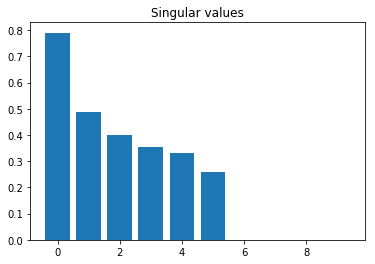

In [7]:
plt.bar(range(pca.n_components_), sv)
plt.title("Singular values")
plt.show()

In [8]:
# gender direction
g_pca_0  = pc[0]/LA.norm(pc[0])
g_pca_01 = (sv[0]*pc[0]+sv[1]*pc[1])/(sv[0]+sv[1])/LA.norm((sv[0]*pc[0]+sv[1]*pc[1])/(sv[0]+sv[1]))

#### Step 2.3: pseudo-LDA

In [9]:
S_word = [['lui','lei'],
          ['uomo','donna'], 
          ['padre','madre'],
          ['marito','moglie'],
          ['fratello','sorella'],
          ['maschio','femmina']]

G_word = db.read('gram_def_mf.txt', 'mf')

In [10]:
S_m_v = []
for w in S_word:
    S_m_v.append(E_ft.v(w[1]))
    
S_f_v = []
for w in S_word:
    S_f_v.append(E_ft.v(w[0]))
    
G_m_v = []
for w in G_word:
    G_m_v.append(E_ft.v(w[0]))
    
G_f_v = []
for w in G_word:
    G_f_v.append(E_ft.v(w[1]))

S_m = np.array(S_m_v).T
S_f = np.array(S_f_v).T
G_m = np.array(G_m_v).T
G_f = np.array(G_f_v).T

In [11]:
# delta semantic
Delta_S = np.dot(np.subtract(S_m, S_f), np.subtract(S_m, S_f).T)

# delta grammatical
Delta_G = np.dot(np.subtract(G_m, G_f), np.subtract(G_m, G_f).T)

# A
A = np.dot(np.linalg.inv(Delta_G), Delta_S)

In [12]:
# eigenvalues and eigenvectors
w, v = np.linalg.eig(A)

# gender direction: pick the eigenvector associated to the largest eigenvalue
g_e = v[:,np.argmax(w)] # already normalized

#### Step 2.6: agency vs communion
For agency and communion we used the same adjectives used by Abele, Uchronski, Suitner and Wojciszke in "Towards an operationalization of the fundamental dimensions of agency and communion: Trait content ratings in five countries considering valence and
frequency of word occurrence", https://onlinelibrary.wiley.com/doi/epdf/10.1002/ejsp.575.

In [13]:
import importlib
importlib.reload(db)

<module 'db_functions' from '/Users/davidebiasion/Documents/tesi/prova dati/agency-communion/db_functions.py'>

In [14]:
# words
agency = db.read('ag_ita.txt', 'ag-com')
communion = db.read('com_ita.txt', 'ag-com')
'''
agency_f_top_10 = db.read('ag_ita_f_top_10.txt', 'ag-com-mf')
communion_f_top_10 = db.read('com_ita_f_top_10.txt', 'ag-com-mf')
agency_m_top_10 = db.read('ag_ita_m_top_10.txt', 'ag-com-mf')
communion_m_top_10 = db.read('com_ita_m_top_10.txt', 'ag-com-mf')
'''
agency_mf_top_10 = db.read('ag_ita_mf_top_10_new.txt', 'ag-com-mf')
communion_mf_top_10 = db.read('com_ita_mf_top_10_new.txt', 'ag-com-mf')

In [15]:
# compute projections
# all words
proj_agency_g_diff =  db.prof_proj(E_ft, agency, g_diff, 'ag-com')
proj_agency_g_pca_0 =  db.prof_proj(E_ft, agency, g_pca_0, 'ag-com')
proj_agency_g_pca_01 =  db.prof_proj(E_ft, agency, g_pca_01, 'ag-com')
proj_agency_g_e =  db.prof_proj(E_ft, agency, g_e, 'ag-com')

proj_communion_g_diff =  db.prof_proj(E_ft, communion, g_diff, 'ag-com')
proj_communion_g_pca_0 =  db.prof_proj(E_ft, communion, g_pca_0, 'ag-com')
proj_communion_g_pca_01 =  db.prof_proj(E_ft, communion, g_pca_01, 'ag-com')
proj_communion_g_e =  db.prof_proj(E_ft, communion, g_e, 'ag-com')

# female top 10
proj_agency_f_g_diff =  db.prof_proj(E_ft, agency_mf_top_10, g_diff, 'ag-com-f')
proj_agency_f_g_pca_0 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_0, 'ag-com-f')
proj_agency_f_g_pca_01 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_01, 'ag-com-f')
proj_agency_f_g_e =  db.prof_proj(E_ft, agency_mf_top_10, g_e, 'ag-com-f')

proj_communion_f_g_diff =  db.prof_proj(E_ft, communion_mf_top_10, g_diff, 'ag-com-f')
proj_communion_f_g_pca_0 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_0, 'ag-com-f')
proj_communion_f_g_pca_01 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_01, 'ag-com-f')
proj_communion_f_g_e =  db.prof_proj(E_ft, communion_mf_top_10, g_e, 'ag-com-f')

# male top 10
proj_agency_m_g_diff =  db.prof_proj(E_ft, agency_mf_top_10, g_diff, 'ag-com-m')
proj_agency_m_g_pca_0 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_0, 'ag-com-m')
proj_agency_m_g_pca_01 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_01, 'ag-com-m')
proj_agency_m_g_e =  db.prof_proj(E_ft, agency_mf_top_10, g_e, 'ag-com-m')

proj_communion_m_g_diff =  db.prof_proj(E_ft, communion_mf_top_10, g_diff, 'ag-com-m')
proj_communion_m_g_pca_0 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_0, 'ag-com-m')
proj_communion_m_g_pca_01 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_01, 'ag-com-m')
proj_communion_m_g_e =  db.prof_proj(E_ft, communion_mf_top_10, g_e, 'ag-com-m')

# male-female top 10
proj_agency_mf_g_diff =  db.prof_proj(E_ft, agency_mf_top_10, g_diff, 'ag-com-mf')
proj_agency_mf_g_pca_0 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_0, 'ag-com-mf')
proj_agency_mf_g_pca_01 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_01, 'ag-com-mf')
proj_agency_mf_g_e =  db.prof_proj(E_ft, agency_mf_top_10, g_e, 'ag-com-mf')

proj_communion_mf_g_diff =  db.prof_proj(E_ft, communion_mf_top_10, g_diff, 'ag-com-mf')
proj_communion_mf_g_pca_0 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_0, 'ag-com-mf')
proj_communion_mf_g_pca_01 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_01, 'ag-com-mf')
proj_communion_mf_g_e =  db.prof_proj(E_ft, communion_mf_top_10, g_e, 'ag-com-mf')

In [16]:
# print agency results
# all words
agency_col0 = [] # pandas columns
agency_col1 = []
agency_col2 = []
agency_col3 = []
agency_col4 = []
agency_col5 = []


for i in range(len(proj_agency_g_diff)):
    agency_col0.append(proj_agency_g_diff[i][0]) # word
    agency_col1.append(proj_agency_g_diff[i][1]) # projection on g_diff
    agency_col2.append(proj_agency_g_pca_0[i][1]) # projection on g_pca_0
    agency_col3.append(proj_agency_g_pca_01[i][1]) # projection on g_pca_01
    agency_col4.append(np.real(proj_agency_g_e[i][1])) # projection on g_e
    agency_col5.append(proj_agency_g_diff[i][2]) # agency score
    
mean_agency_g_diff = np.mean(agency_col1)
mean_agency_g_pca_0 = np.mean(agency_col2)
mean_agency_g_pca_01 = np.mean(agency_col3)
mean_agency_g_e = np.mean(agency_col4)
mean_agency_score = np.mean(agency_col5)

agency_col0.append('MEAN')
agency_col1.append(mean_agency_g_diff)
agency_col2.append(mean_agency_g_pca_0)
agency_col3.append(mean_agency_g_pca_01)
agency_col4.append(mean_agency_g_e)
agency_col5.append(mean_agency_score)

agency_data = {'Word':agency_col0, 
               'Proj g_diff':agency_col1,
               'Proj g_pca_0':agency_col2, 
               'Proj g_pca_01':agency_col3,
               'Proj g_e':agency_col4,
               'Agency':agency_col5}

agency_table = pd.DataFrame(agency_data)
agency_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency
0,abile,0.105879,-0.136736,-0.095271,-0.012335,2.320000
1,attivo,0.143503,-0.179129,-0.129719,-0.037692,2.350000
2,ambizioso,0.119887,-0.171909,-0.093449,0.061541,2.790000
3,deciso,0.032785,-0.003449,0.039263,0.008724,2.880000
4,vanitoso,-0.017311,-0.026286,0.000846,-0.021939,1.290000
5,capace,0.080204,-0.068718,-0.096767,-0.112970,2.450000
6,competente,0.112466,-0.042337,0.000529,-0.040653,2.210000
7,competitivo,0.049996,-0.121939,-0.092514,-0.000099,2.710000
8,presuntuoso,0.086057,-0.087454,-0.066513,-0.024466,1.530000
9,creativo,-0.010048,-0.047422,-0.034281,-0.048449,1.630000


In [17]:
# agency pearson correlation
r_agency_g_diff = scipy.stats.pearsonr(agency_col5, agency_col1)[0]
r_agency_g_pca_0 = scipy.stats.pearsonr(agency_col5, agency_col2)[0]
r_agency_g_pca_01 = scipy.stats.pearsonr(agency_col5, agency_col3)[0]
r_agency_g_e = scipy.stats.pearsonr(agency_col5, agency_col4)[0]

In [18]:
pearson_data = {'g_diff':r_agency_g_diff,
                'g_pca_0':r_agency_g_pca_0,
                'g_pca_01':r_agency_g_pca_01,
                'g_e':r_agency_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,0.376887,-0.29962,-0.181032,-0.037844


In [19]:
# print communion results
# all words
communion_col0 = [] # pandas columns
communion_col1 = []
communion_col2 = []
communion_col3 = []
communion_col4 = []
communion_col5 = []

for i in range(len(proj_communion_g_diff)):
    communion_col0.append(proj_communion_g_diff[i][0]) # word
    communion_col1.append(proj_communion_g_diff[i][1]) # projection on g_diff
    communion_col2.append(proj_communion_g_pca_0[i][1]) # projection on g_pca_0
    communion_col3.append(proj_communion_g_pca_01[i][1]) # projection on g_pca_01
    communion_col4.append(np.real(proj_communion_g_e[i][1])) # projection on g_e
    communion_col5.append(proj_communion_g_diff[i][2]) # communion score
    
mean_communion_g_diff = np.mean(communion_col1)
mean_communion_g_pca_0 = np.mean(communion_col2)
mean_communion_g_pca_01 = np.mean(communion_col3)
mean_communion_g_e = np.mean(communion_col4)
mean_communion_score = np.mean(communion_col5)

communion_col0.append('MEAN')
communion_col1.append(mean_communion_g_diff)
communion_col2.append(mean_communion_g_pca_0)
communion_col3.append(mean_communion_g_pca_01)
communion_col4.append(mean_communion_g_e)
communion_col5.append(mean_communion_score)

communion_data = {'Word':communion_col0, 
               'Proj g_diff':communion_col1,
               'Proj g_pca_0':communion_col2, 
               'Proj g_pca_01':communion_col3,
               'Proj g_e':communion_col4,
               'communion':communion_col5}

communion_table = pd.DataFrame(communion_data)
communion_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,communion
0,affettuoso,-0.057171,0.055932,0.033112,-0.065575,1.580000
1,altruista,-0.089521,0.042477,0.042716,-0.011063,2.500000
2,comunicativo,0.044987,-0.046174,-0.072635,-0.079243,2.000000
3,coscienzioso,0.136342,-0.096060,-0.072703,-0.032397,1.320000
4,rispettoso,0.107447,-0.137364,-0.133835,-0.029307,1.550000
5,coerente,0.087400,-0.042743,-0.076009,-0.087420,1.680000
6,emotivo,-0.053989,0.016008,0.028225,-0.000844,1.370000
7,giusto,0.068803,-0.077905,-0.045295,-0.031802,1.950000
8,amichevole,0.051062,-0.010913,-0.019018,-0.009578,2.230000
9,disponibile,-0.095916,0.047888,0.027702,0.034715,2.760000


In [20]:
# communion pearson correlation
r_communion_g_diff = scipy.stats.pearsonr(communion_col5, communion_col1)[0]
r_communion_g_pca_0 = scipy.stats.pearsonr(communion_col5, communion_col2)[0]
r_communion_g_pca_01 = scipy.stats.pearsonr(communion_col5, communion_col3)[0]
r_communion_g_e = scipy.stats.pearsonr(communion_col5, communion_col4)[0]

In [21]:
pearson_data = {'g_diff':r_communion_g_diff,
                'g_pca_0':r_communion_g_pca_0,
                'g_pca_01':r_communion_g_pca_01,
                'g_e':r_communion_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.041554,0.037894,-0.02931,0.266844


In [22]:
# print agency results
# female top 10
agency_f_col0 = [] # pandas columns
agency_f_col1 = []
agency_f_col2 = []
agency_f_col3 = []
agency_f_col4 = []
agency_f_col5 = []
agency_f_col6 = []

for i in range(len(proj_agency_f_g_diff)):
    agency_f_col0.append(proj_agency_f_g_diff[i][0]) # word
    agency_f_col1.append(proj_agency_f_g_diff[i][1]) # projection on g_diff
    agency_f_col2.append(proj_agency_f_g_pca_0[i][1]) # projection on g_pca_0
    agency_f_col3.append(proj_agency_f_g_pca_01[i][1]) # projection on g_pca_01
    agency_f_col4.append(np.real(proj_agency_f_g_e[i][1])) # projection on g_e
    agency_f_col5.append(proj_agency_f_g_diff[i][2]) # agency_f score
    agency_f_col6.append(proj_agency_f_g_diff[i][3]) # communion_f score

    
mean_agency_f_g_diff = np.mean(agency_f_col1)
mean_agency_f_g_pca_0 = np.mean(agency_f_col2)
mean_agency_f_g_pca_01 = np.mean(agency_f_col3)
mean_agency_f_g_e = np.mean(agency_f_col4)
mean_agency_f_score1 = np.mean(agency_f_col5)
mean_agency_f_score2 = np.mean(agency_f_col6)

agency_f_col0.append('MEAN')
agency_f_col1.append(mean_agency_f_g_diff)
agency_f_col2.append(mean_agency_f_g_pca_0)
agency_f_col3.append(mean_agency_f_g_pca_01)
agency_f_col4.append(mean_agency_f_g_e)
agency_f_col5.append(mean_agency_f_score1)
agency_f_col6.append(mean_agency_f_score2)

agency_f_data = {'Word':agency_f_col0, 
               'Proj g_diff':agency_f_col1,
               'Proj g_pca_0':agency_f_col2, 
               'Proj g_pca_01':agency_f_col3,
               'Proj g_e':agency_f_col4,
               'Agency':agency_f_col5,
               'Communion':agency_f_col6}

agency_f_table = pd.DataFrame(agency_f_data)
agency_f_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,ambiziosa,-0.060695,0.140713,0.177447,0.078144,2.790,-0.970
1,decisa,-0.012327,0.122522,0.150207,-0.006840,2.880,0.430
2,competitiva,-0.032577,0.053857,0.079572,-0.003998,2.710,-1.390
3,determinata,-0.052541,0.121169,0.081159,-0.088817,2.730,0.530
4,dominante,-0.015997,0.026745,0.016411,0.051830,2.760,-1.890
5,indipendente,0.028278,0.038029,0.025348,-0.105108,2.650,-0.830
6,autonoma,0.035128,0.030046,0.004582,-0.110083,2.760,-0.470
7,combattiva,0.003825,0.049586,0.033032,-0.063164,2.550,0.350
8,capace,0.080204,-0.068718,-0.096767,-0.112970,2.450,1.080
9,risoluta,-0.039606,0.080464,0.118878,-0.001998,2.480,0.030


In [23]:
# agency pearson correlation
r_agency_f_g_diff = scipy.stats.pearsonr(agency_f_col5, agency_f_col1)[0]
r_agency_f_g_pca_0 = scipy.stats.pearsonr(agency_f_col5, agency_f_col2)[0]
r_agency_f_g_pca_01 = scipy.stats.pearsonr(agency_f_col5, agency_f_col3)[0]
r_agency_f_g_e = scipy.stats.pearsonr(agency_f_col5, agency_f_col4)[0]

In [24]:
pearson_data = {'g_diff':r_agency_f_g_diff,
                'g_pca_0':r_agency_f_g_pca_0,
                'g_pca_01':r_agency_f_g_pca_01,
                'g_e':r_agency_f_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.417145,0.600865,0.526408,0.388956


In [25]:
# agency pearson correlation ag-com
r_agency_f_g_diff = scipy.stats.pearsonr(np.array(agency_f_col5)-np.array(agency_f_col6), agency_f_col1)[0]
r_agency_f_g_pca_0 = scipy.stats.pearsonr(np.array(agency_f_col5)-np.array(agency_f_col6), agency_f_col2)[0]
r_agency_f_g_pca_01 = scipy.stats.pearsonr(np.array(agency_f_col5)-np.array(agency_f_col6), agency_f_col3)[0]
r_agency_f_g_e = scipy.stats.pearsonr(np.array(agency_f_col5)-np.array(agency_f_col6), agency_f_col4)[0]

In [26]:
pearson_data = {'g_diff':r_agency_f_g_diff,
                'g_pca_0':r_agency_f_g_pca_0,
                'g_pca_01':r_agency_f_g_pca_01,
                'g_e':r_agency_f_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.372448,0.188381,0.255584,0.582828


In [27]:
# print communion results
# female top 10
communion_f_col0 = [] # pandas columns
communion_f_col1 = []
communion_f_col2 = []
communion_f_col3 = []
communion_f_col4 = []
communion_f_col5 = []
communion_f_col6 = []

for i in range(len(proj_communion_f_g_diff)):
    communion_f_col0.append(proj_communion_f_g_diff[i][0]) # word
    communion_f_col1.append(proj_communion_f_g_diff[i][1]) # projection on g_diff
    communion_f_col2.append(proj_communion_f_g_pca_0[i][1]) # projection on g_pca_0
    communion_f_col3.append(proj_communion_f_g_pca_01[i][1]) # projection on g_pca_01
    communion_f_col4.append(np.real(proj_communion_f_g_e[i][1])) # projection on g_e
    communion_f_col5.append(proj_communion_f_g_diff[i][2]) # communion_f score
    communion_f_col6.append(proj_communion_f_g_diff[i][3]) # communion_f score
    
mean_communion_f_g_diff = np.mean(communion_f_col1)
mean_communion_f_g_pca_0 = np.mean(communion_f_col2)
mean_communion_f_g_pca_01 = np.mean(communion_f_col3)
mean_communion_f_g_e = np.mean(communion_f_col4)
mean_communion_f_score1 = np.mean(communion_f_col5)
mean_communion_f_score2 = np.mean(communion_f_col6)

communion_f_col0.append('MEAN')
communion_f_col1.append(mean_communion_f_g_diff)
communion_f_col2.append(mean_communion_f_g_pca_0)
communion_f_col3.append(mean_communion_f_g_pca_01)
communion_f_col4.append(mean_communion_f_g_e)
communion_f_col5.append(mean_communion_f_score1)
communion_f_col6.append(mean_communion_f_score2)

communion_f_data = {'Word':communion_f_col0, 
               'Proj g_diff':communion_f_col1,
               'Proj g_pca_0':communion_f_col2, 
               'Proj g_pca_01':communion_f_col3,
               'Proj g_e':communion_f_col4,
               'Agency':communion_f_col5,
               'Communion':communion_f_col6}

communion_f_table = pd.DataFrame(communion_f_data)
communion_f_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,altruista,-0.089521,0.042477,0.042716,-0.011063,-1.180,2.500
1,amichevole,0.051062,-0.010913,-0.019018,-0.009578,0.150,2.230
2,disponibile,-0.095916,0.047888,0.027702,0.034715,-0.420,2.760
3,onesta,-0.029719,0.136684,0.145981,-0.014239,-0.710,2.340
4,leale,0.103859,-0.074953,-0.056906,-0.029116,-0.880,2.280
5,affidabile,0.134809,-0.055064,-0.071459,-0.006869,0.450,2.210
6,socievole,-0.087617,0.019934,-0.003408,0.002551,0.660,2.710
7,empatica,-0.130075,0.124107,0.069082,-0.035654,-0.530,2.210
8,tollerante,0.066366,-0.034339,-0.062102,-0.069806,-0.340,2.630
9,comprensiva,-0.059858,0.095803,0.051094,-0.017672,-0.370,2.450


In [28]:
# communion pearson correlation
r_communion_f_g_diff = scipy.stats.pearsonr(communion_f_col6, communion_f_col1)[0]
r_communion_f_g_pca_0 = scipy.stats.pearsonr(communion_f_col6, communion_f_col2)[0]
r_communion_f_g_pca_01 = scipy.stats.pearsonr(communion_f_col6, communion_f_col3)[0]
r_communion_f_g_e = scipy.stats.pearsonr(communion_f_col6, communion_f_col4)[0]

In [29]:
pearson_data = {'g_diff':r_communion_f_g_diff,
                'g_pca_0':r_communion_f_g_pca_0,
                'g_pca_01':r_communion_f_g_pca_01,
                'g_e':r_communion_f_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.414161,0.033913,-0.005718,0.280232


In [30]:
# communion pearson correlation ag-com
r_communion_f_g_diff = scipy.stats.pearsonr(np.array(communion_f_col5)-np.array(communion_f_col6), communion_f_col1)[0]
r_communion_f_g_pca_0 = scipy.stats.pearsonr(np.array(communion_f_col5)-np.array(communion_f_col6), communion_f_col2)[0]
r_communion_f_g_pca_01 = scipy.stats.pearsonr(np.array(communion_f_col5)-np.array(communion_f_col6), communion_f_col3)[0]
r_communion_f_g_e = scipy.stats.pearsonr(np.array(communion_f_col5)-np.array(communion_f_col6), communion_f_col4)[0]

In [31]:
pearson_data = {'g_diff':r_communion_f_g_diff,
                'g_pca_0':r_communion_f_g_pca_0,
                'g_pca_01':r_communion_f_g_pca_01,
                'g_e':r_communion_f_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,0.36144,-0.289849,-0.395347,0.113023


In [32]:
# print agency results
# male top 10
agency_m_col0 = [] # pandas columns
agency_m_col1 = []
agency_m_col2 = []
agency_m_col3 = []
agency_m_col4 = []
agency_m_col5 = []
agency_m_col6 = []


for i in range(len(proj_agency_m_g_diff)):
    agency_m_col0.append(proj_agency_m_g_diff[i][0]) # word
    agency_m_col1.append(proj_agency_m_g_diff[i][1]) # projection on g_diff
    agency_m_col2.append(proj_agency_m_g_pca_0[i][1]) # projection on g_pca_0
    agency_m_col3.append(proj_agency_m_g_pca_01[i][1]) # projection on g_pca_01
    agency_m_col4.append(np.real(proj_agency_m_g_e[i][1])) # projection on g_e
    agency_m_col5.append(proj_agency_m_g_diff[i][2]) # agency_f score
    agency_m_col6.append(proj_agency_m_g_diff[i][3]) # agency_f score
    
mean_agency_m_g_diff = np.mean(agency_m_col1)
mean_agency_m_g_pca_0 = np.mean(agency_m_col2)
mean_agency_m_g_pca_01 = np.mean(agency_m_col3)
mean_agency_m_g_e = np.mean(agency_m_col4)
mean_agency_m_score1 = np.mean(agency_m_col5)
mean_agency_m_score2 = np.mean(agency_m_col6)

agency_m_col0.append('MEAN')
agency_m_col1.append(mean_agency_m_g_diff)
agency_m_col2.append(mean_agency_m_g_pca_0)
agency_m_col3.append(mean_agency_m_g_pca_01)
agency_m_col4.append(mean_agency_m_g_e)
agency_m_col5.append(mean_agency_m_score1)
agency_m_col6.append(mean_agency_m_score2)

agency_m_data = {'Word':agency_m_col0, 
               'Proj g_diff':agency_m_col1,
               'Proj g_pca_0':agency_m_col2, 
               'Proj g_pca_01':agency_m_col3,
               'Proj g_e':agency_m_col4,
               'Agency':agency_m_col5,
               'Communion':agency_m_col6}

agency_m_table = pd.DataFrame(agency_m_data)
agency_m_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,ambizioso,0.119887,-0.171909,-0.093449,0.061541,2.790,-0.970
1,deciso,0.032785,-0.003449,0.039263,0.008724,2.880,0.430
2,competitivo,0.049996,-0.121939,-0.092514,-0.000099,2.710,-1.390
3,determinato,0.082275,-0.102753,-0.119700,-0.088175,2.730,0.530
4,dominante,-0.015997,0.026745,0.016411,0.051830,2.760,-1.890
5,indipendente,0.028278,0.038029,0.025348,-0.105108,2.650,-0.830
6,autonomo,0.060872,-0.057399,-0.039827,-0.115945,2.760,-0.470
7,combattivo,0.157384,-0.159183,-0.127921,-0.056086,2.550,0.350
8,capace,0.080204,-0.068718,-0.096767,-0.112970,2.450,1.080
9,risoluto,0.066344,-0.123002,-0.032980,0.012821,2.480,0.030


In [33]:
# agency pearson correlation
r_agency_m_g_diff = scipy.stats.pearsonr(agency_m_col5, agency_m_col1)[0]
r_agency_m_g_pca_0 = scipy.stats.pearsonr(agency_m_col5, agency_m_col2)[0]
r_agency_m_g_pca_01 = scipy.stats.pearsonr(agency_m_col5, agency_m_col3)[0]
r_agency_m_g_e = scipy.stats.pearsonr(agency_m_col5, agency_m_col4)[0]

In [34]:
pearson_data = {'g_diff':r_agency_m_g_diff,
                'g_pca_0':r_agency_m_g_pca_0,
                'g_pca_01':r_agency_m_g_pca_01,
                'g_e':r_agency_m_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.347559,0.275435,0.372662,0.358404


In [35]:
# agency pearson correlation ag-com
r_agency_m_g_diff = scipy.stats.pearsonr(np.array(agency_m_col5)-np.array(agency_m_col6), agency_m_col1)[0]
r_agency_m_g_pca_0 = scipy.stats.pearsonr(np.array(agency_m_col5)-np.array(agency_m_col6), agency_m_col2)[0]
r_agency_m_g_pca_01 = scipy.stats.pearsonr(np.array(agency_m_col5)-np.array(agency_m_col6), agency_m_col3)[0]
r_agency_m_g_e = scipy.stats.pearsonr(np.array(agency_m_col5)-np.array(agency_m_col6), agency_m_col4)[0]

In [36]:
pearson_data = {'g_diff':r_agency_m_g_diff,
                'g_pca_0':r_agency_m_g_pca_0,
                'g_pca_01':r_agency_m_g_pca_01,
                'g_e':r_agency_m_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.499348,0.244082,0.355707,0.534504


In [37]:
# print communion results
# male top 10
communion_m_col0 = [] # pandas columns
communion_m_col1 = []
communion_m_col2 = []
communion_m_col3 = []
communion_m_col4 = []
communion_m_col5 = []
communion_m_col6 = []

for i in range(len(proj_communion_m_g_diff)):
    communion_m_col0.append(proj_communion_m_g_diff[i][0]) # word
    communion_m_col1.append(proj_communion_m_g_diff[i][1]) # projection on g_diff
    communion_m_col2.append(proj_communion_m_g_pca_0[i][1]) # projection on g_pca_0
    communion_m_col3.append(proj_communion_m_g_pca_01[i][1]) # projection on g_pca_01
    communion_m_col4.append(np.real(proj_communion_m_g_e[i][1])) # projection on g_e
    communion_m_col5.append(proj_communion_m_g_diff[i][2]) # communion_f score
    communion_m_col6.append(proj_communion_m_g_diff[i][3]) # communion_f score
    
mean_communion_m_g_diff = np.mean(communion_m_col1)
mean_communion_m_g_pca_0 = np.mean(communion_m_col2)
mean_communion_m_g_pca_01 = np.mean(communion_m_col3)
mean_communion_m_g_e = np.mean(communion_m_col4)
mean_communion_m_score1 = np.mean(communion_m_col5)
mean_communion_m_score2 = np.mean(communion_m_col6)

communion_m_col0.append('MEAN')
communion_m_col1.append(mean_communion_m_g_diff)
communion_m_col2.append(mean_communion_m_g_pca_0)
communion_m_col3.append(mean_communion_m_g_pca_01)
communion_m_col4.append(mean_communion_m_g_e)
communion_m_col5.append(mean_communion_m_score1)
communion_m_col6.append(mean_communion_m_score2)

communion_m_data = {'Word':communion_m_col0, 
               'Proj g_diff':communion_m_col1,
               'Proj g_pca_0':communion_m_col2, 
               'Proj g_pca_01':communion_m_col3,
               'Proj g_e':communion_m_col4,
               'Agency':communion_m_col5,
               'Communion':communion_m_col6}

communion_m_table = pd.DataFrame(communion_m_data)
communion_m_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,altruista,-0.089521,0.042477,0.042716,-0.011063,-1.180,2.500
1,amichevole,0.051062,-0.010913,-0.019018,-0.009578,0.150,2.230
2,disponibile,-0.095916,0.047888,0.027702,0.034715,-0.420,2.760
3,onesto,0.133471,-0.172738,-0.145135,-0.021582,-0.710,2.340
4,leale,0.103859,-0.074953,-0.056906,-0.029116,-0.880,2.280
5,affidabile,0.134809,-0.055064,-0.071459,-0.006869,0.450,2.210
6,socievole,-0.087617,0.019934,-0.003408,0.002551,0.660,2.710
7,empatico,0.007777,-0.114125,-0.141964,-0.050968,-0.530,2.210
8,tollerante,0.066366,-0.034339,-0.062102,-0.069806,-0.340,2.630
9,comprensivo,0.004860,-0.040706,-0.053688,-0.027454,-0.370,2.450


In [38]:
# communion pearson correlation
r_communion_m_g_diff = scipy.stats.pearsonr(communion_m_col6, communion_m_col1)[0]
r_communion_m_g_pca_0 = scipy.stats.pearsonr(communion_m_col6, communion_m_col2)[0]
r_communion_m_g_pca_01 = scipy.stats.pearsonr(communion_m_col6, communion_m_col3)[0]
r_communion_m_g_e = scipy.stats.pearsonr(communion_m_col6, communion_m_col4)[0]

In [39]:
pearson_data = {'g_diff':r_communion_m_g_diff,
                'g_pca_0':r_communion_m_g_pca_0,
                'g_pca_01':r_communion_m_g_pca_01,
                'g_e':r_communion_m_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.69233,0.63382,0.592455,0.334056


In [40]:
# communion pearson correlation ag-com
r_communion_m_g_diff = scipy.stats.pearsonr(np.array(communion_m_col5)-np.array(communion_m_col6), communion_m_col1)[0]
r_communion_m_g_pca_0 = scipy.stats.pearsonr(np.array(communion_m_col5)-np.array(communion_m_col6), communion_m_col2)[0]
r_communion_m_g_pca_01 = scipy.stats.pearsonr(np.array(communion_m_col5)-np.array(communion_m_col6), communion_m_col3)[0]
r_communion_m_g_e = scipy.stats.pearsonr(np.array(communion_m_col5)-np.array(communion_m_col6), communion_m_col4)[0]

In [41]:
pearson_data = {'g_diff':r_communion_m_g_diff,
                'g_pca_0':r_communion_m_g_pca_0,
                'g_pca_01':r_communion_m_g_pca_01,
                'g_e':r_communion_m_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,0.271096,-0.041696,-0.157779,0.123609


In [42]:
# print agency results
# male-female top 10
agency_mf_col0 = [] # pandas columns
agency_mf_col1 = []
agency_mf_col2 = []
agency_mf_col3 = []
agency_mf_col4 = []
agency_mf_col5 = []
agency_mf_col6 = []


for i in range(len(proj_agency_mf_g_diff)):
    agency_mf_col0.append(proj_agency_mf_g_diff[i][0]) # word
    agency_mf_col1.append(proj_agency_mf_g_diff[i][1]) # projection on g_diff
    agency_mf_col2.append(proj_agency_mf_g_pca_0[i][1]) # projection on g_pca_0
    agency_mf_col3.append(proj_agency_mf_g_pca_01[i][1]) # projection on g_pca_01
    agency_mf_col4.append(np.real(proj_agency_mf_g_e[i][1])) # projection on g_e
    agency_mf_col5.append(proj_agency_mf_g_diff[i][2]) # agency_f score
    agency_mf_col6.append(proj_agency_mf_g_diff[i][3]) # agency_f score
    
mean_agency_mf_g_diff = np.mean(agency_mf_col1)
mean_agency_mf_g_pca_0 = np.mean(agency_mf_col2)
mean_agency_mf_g_pca_01 = np.mean(agency_mf_col3)
mean_agency_mf_g_e = np.mean(agency_mf_col4)
mean_agency_mf_score1 = np.mean(agency_mf_col5)
mean_agency_mf_score2 = np.mean(agency_mf_col6)

agency_mf_col0.append('MEAN')
agency_mf_col1.append(mean_agency_mf_g_diff)
agency_mf_col2.append(mean_agency_mf_g_pca_0)
agency_mf_col3.append(mean_agency_mf_g_pca_01)
agency_mf_col4.append(mean_agency_mf_g_e)
agency_mf_col5.append(mean_agency_mf_score1)
agency_mf_col6.append(mean_agency_mf_score2)

agency_mf_data = {'Word':agency_mf_col0, 
               'Proj g_diff':agency_mf_col1,
               'Proj g_pca_0':agency_mf_col2, 
               'Proj g_pca_01':agency_mf_col3,
               'Proj g_e':agency_mf_col4,
               'Agency':agency_mf_col5,
               'Communion':agency_mf_col6}

agency_mf_table = pd.DataFrame(agency_mf_data)
agency_mf_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,ambizioso,0.029596,-0.015598,0.041999,0.069842,2.790,-0.970
1,deciso,0.010229,0.059537,0.094735,0.000942,2.880,0.430
2,competitivo,0.008709,-0.034041,-0.006471,-0.002048,2.710,-1.390
3,determinato,0.014867,0.009208,-0.019270,-0.088496,2.730,0.530
4,dominante,-0.015997,0.026745,0.016411,0.051830,2.760,-1.890
5,indipendente,0.028278,0.038029,0.025348,-0.105108,2.650,-0.830
6,autonomo,0.048000,-0.013676,-0.017622,-0.113014,2.760,-0.470
7,combattivo,0.080605,-0.054799,-0.047445,-0.059625,2.550,0.350
8,capace,0.080204,-0.068718,-0.096767,-0.112970,2.450,1.080
9,risoluto,0.013369,-0.021269,0.042949,0.005411,2.480,0.030


In [43]:
# agency pearson correlation
r_agency_mf_g_diff = scipy.stats.pearsonr(agency_mf_col5, agency_mf_col1)[0]
r_agency_mf_g_pca_0 = scipy.stats.pearsonr(agency_mf_col5, agency_mf_col2)[0]
r_agency_mf_g_pca_01 = scipy.stats.pearsonr(agency_mf_col5, agency_mf_col3)[0]
r_agency_mf_g_e = scipy.stats.pearsonr(agency_mf_col5, agency_mf_col4)[0]

In [44]:
pearson_data = {'g_diff':r_agency_mf_g_diff,
                'g_pca_0':r_agency_mf_g_pca_0,
                'g_pca_01':r_agency_mf_g_pca_01,
                'g_e':r_agency_mf_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.56205,0.70314,0.612233,0.37458


In [45]:
# agency pearson correlation ag-com
r_agency_mf_g_diff = scipy.stats.pearsonr(np.array(agency_mf_col5)-np.array(agency_mf_col6), agency_mf_col1)[0]
r_agency_mf_g_pca_0 = scipy.stats.pearsonr(np.array(agency_mf_col5)-np.array(agency_mf_col6), agency_mf_col2)[0]
r_agency_mf_g_pca_01 = scipy.stats.pearsonr(np.array(agency_mf_col5)-np.array(agency_mf_col6), agency_mf_col3)[0]
r_agency_mf_g_e = scipy.stats.pearsonr(np.array(agency_mf_col5)-np.array(agency_mf_col6), agency_mf_col4)[0]

In [46]:
pearson_data = {'g_diff':r_agency_mf_g_diff,
                'g_pca_0':r_agency_mf_g_pca_0,
                'g_pca_01':r_agency_mf_g_pca_01,
                'g_e':r_agency_mf_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.6481,0.364927,0.399503,0.560014


In [47]:
# print communion results
# male-female top 10
communion_mf_col0 = [] # pandas columns
communion_mf_col1 = []
communion_mf_col2 = []
communion_mf_col3 = []
communion_mf_col4 = []
communion_mf_col5 = []
communion_mf_col6 = []

for i in range(len(proj_communion_mf_g_diff)):
    communion_mf_col0.append(proj_communion_mf_g_diff[i][0]) # word
    communion_mf_col1.append(proj_communion_mf_g_diff[i][1]) # projection on g_diff
    communion_mf_col2.append(proj_communion_mf_g_pca_0[i][1]) # projection on g_pca_0
    communion_mf_col3.append(proj_communion_mf_g_pca_01[i][1]) # projection on g_pca_01
    communion_mf_col4.append(np.real(proj_communion_mf_g_e[i][1])) # projection on g_e
    communion_mf_col5.append(proj_communion_mf_g_diff[i][2]) # communion_f score
    communion_mf_col6.append(proj_communion_mf_g_diff[i][3]) # communion_f score
    
mean_communion_mf_g_diff = np.mean(communion_mf_col1)
mean_communion_mf_g_pca_0 = np.mean(communion_mf_col2)
mean_communion_mf_g_pca_01 = np.mean(communion_mf_col3)
mean_communion_mf_g_e = np.mean(communion_mf_col4)
mean_communion_mf_score1 = np.mean(communion_mf_col5)
mean_communion_mf_score2 = np.mean(communion_mf_col6)

communion_mf_col0.append('MEAN')
communion_mf_col1.append(mean_communion_mf_g_diff)
communion_mf_col2.append(mean_communion_mf_g_pca_0)
communion_mf_col3.append(mean_communion_mf_g_pca_01)
communion_mf_col4.append(mean_communion_mf_g_e)
communion_mf_col5.append(mean_communion_mf_score1)
communion_mf_col6.append(mean_communion_mf_score2)

communion_mf_data = {'Word':communion_mf_col0, 
               'Proj g_diff':communion_mf_col1,
               'Proj g_pca_0':communion_mf_col2, 
               'Proj g_pca_01':communion_mf_col3,
               'Proj g_e':communion_mf_col4,
               'Agency':communion_mf_col5,
               'Communion':communion_mf_col6}

communion_mf_table = pd.DataFrame(communion_mf_data)
communion_mf_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,altruista,-0.089521,0.042477,0.042716,-0.011063,-1.180,2.500
1,amichevole,0.051062,-0.010913,-0.019018,-0.009578,0.150,2.230
2,disponibile,-0.095916,0.047888,0.027702,0.034715,-0.420,2.760
3,onesto,0.051876,-0.018027,0.000423,-0.017910,-0.710,2.340
4,leale,0.103859,-0.074953,-0.056906,-0.029116,-0.880,2.280
5,affidabile,0.134809,-0.055064,-0.071459,-0.006869,0.450,2.210
6,socievole,-0.087617,0.019934,-0.003408,0.002551,0.660,2.710
7,empatico,-0.061149,0.004991,-0.036441,-0.043311,-0.530,2.210
8,tollerante,0.066366,-0.034339,-0.062102,-0.069806,-0.340,2.630
9,comprensivo,-0.027499,0.027549,-0.001297,-0.022563,-0.370,2.450


In [48]:
# communion pearson correlation
r_communion_mf_g_diff = scipy.stats.pearsonr(communion_mf_col6, communion_mf_col1)[0]
r_communion_mf_g_pca_0 = scipy.stats.pearsonr(communion_mf_col6, communion_mf_col2)[0]
r_communion_mf_g_pca_01 = scipy.stats.pearsonr(communion_mf_col6, communion_mf_col3)[0]
r_communion_mf_g_e = scipy.stats.pearsonr(communion_mf_col6, communion_mf_col4)[0]

In [49]:
pearson_data = {'g_diff':r_communion_mf_g_diff,
                'g_pca_0':r_communion_mf_g_pca_0,
                'g_pca_01':r_communion_mf_g_pca_01,
                'g_e':r_communion_mf_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.585774,0.56515,0.482321,0.309408


In [50]:
# communion pearson correlation ag-com
r_communion_mf_g_diff = scipy.stats.pearsonr(np.array(communion_mf_col5)-np.array(communion_mf_col6), communion_mf_col1)[0]
r_communion_mf_g_pca_0 = scipy.stats.pearsonr(np.array(communion_mf_col5)-np.array(communion_mf_col6), communion_mf_col2)[0]
r_communion_mf_g_pca_01 = scipy.stats.pearsonr(np.array(communion_mf_col5)-np.array(communion_mf_col6), communion_mf_col3)[0]
r_communion_mf_g_e = scipy.stats.pearsonr(np.array(communion_mf_col5)-np.array(communion_mf_col6), communion_mf_col4)[0]

In [51]:
pearson_data = {'g_diff':r_communion_mf_g_diff,
                'g_pca_0':r_communion_mf_g_pca_0,
                'g_pca_01':r_communion_mf_g_pca_01,
                'g_e':r_communion_mf_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,0.337829,-0.295089,-0.482939,0.119022


In [52]:
def plot_gender_pairs(ax, gender_direction, real):
    
    gender_pairs_proj = []
    if real == False:
        for pair in gender_pairs:
                gender_pairs_proj.append([np.real(np.dot(E_ft.v(pair[0]), gender_direction)), np.real(np.dot(E_ft.v(pair[1]), gender_direction))])
    else:
        for pair in gender_pairs:
            gender_pairs_proj.append([np.dot(E_ft.v(pair[0]), gender_direction), np.dot(E_ft.v(pair[1]), gender_direction)])

    
    for pair in gender_pairs_proj:
        ax.scatter(pair[0], 0, color='blue')
        ax.scatter(pair[1], 0, color='pink')

    plt.annotate(gender_pairs[0][0],
                xy=(gender_pairs_proj[0][0], 0),
                xytext=(gender_pairs_proj[0][0], -0.01),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[1][0],
                xy=(gender_pairs_proj[1][0], 0),
                xytext=(gender_pairs_proj[1][0], -0.01),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[2][0],
                xy=(gender_pairs_proj[2][0], 0),
                xytext=(gender_pairs_proj[2][0], -0.0075),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[3][0],
                xy=(gender_pairs_proj[3][0], 0),
                xytext=(gender_pairs_proj[3][0], -0.01),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[4][0],
                xy=(gender_pairs_proj[4][0], 0),
                xytext=(gender_pairs_proj[4][0], -0.005),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[5][0],
                xy=(gender_pairs_proj[5][0], 0),
                xytext=(gender_pairs_proj[5][0], -0.0075),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[0][1],
                xy=(gender_pairs_proj[0][1], 0),
                xytext=(gender_pairs_proj[0][1], 0.0025),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[1][1],
                xy=(gender_pairs_proj[1][1], 0),
                xytext=(gender_pairs_proj[1][1], 0.01),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[2][1],
                xy=(gender_pairs_proj[2][1], 0),
                xytext=(gender_pairs_proj[2][1], 0.005),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[3][1],
                xy=(gender_pairs_proj[3][1], 0),
                xytext=(gender_pairs_proj[3][1], 0.01),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[4][1],
                xy=(gender_pairs_proj[4][1], 0),
                xytext=(gender_pairs_proj[4][1], -0.005),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(gender_pairs[5][1],
                xy=(gender_pairs_proj[5][1], 0),
                xytext=(gender_pairs_proj[5][1], 0.0075),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

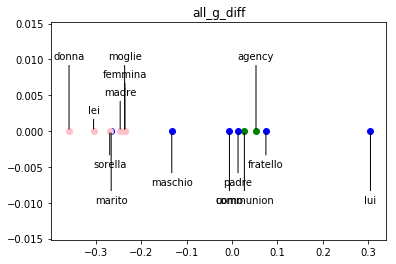

In [54]:
# all words plot g_diff
fig, ax = plt.subplots()
ax.scatter([mean_agency_g_diff, mean_communion_g_diff], [0, 0], color='green')
plot_gender_pairs(ax, g_diff, False)

ax.set_title('all_g_diff')

plt.annotate('agency',
            xy=(mean_agency_g_diff, 0),
            xytext=(mean_agency_g_diff, 0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_g_diff, 0),
            xytext=(mean_communion_g_diff, -0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_all_g_diff')

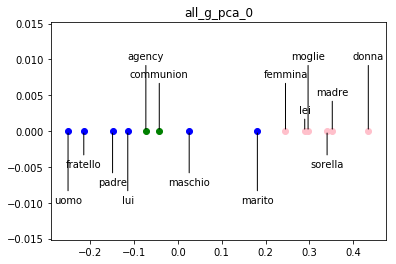

In [55]:
# all words plot g_pca_0
fig, ax = plt.subplots()
ax.scatter([mean_agency_g_pca_0, mean_communion_g_pca_0], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_0, False)

ax.set_title('all_g_pca_0')

plt.annotate('agency',
            xy=(mean_agency_g_pca_0, 0),
            xytext=(mean_agency_g_pca_0, 0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_g_pca_0, 0),
            xytext=(mean_communion_g_pca_0, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_all_g_pca_0')

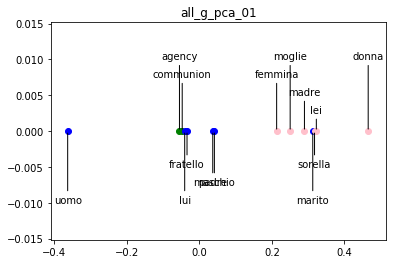

In [56]:
# all words plot g_pca_01
fig, ax = plt.subplots()
ax.scatter([mean_agency_g_pca_01, mean_communion_g_pca_01], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_01, False)

ax.set_title('all_g_pca_01')

plt.annotate('agency',
            xy=(mean_agency_g_pca_01, 0),
            xytext=(mean_agency_g_pca_01, 0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_g_pca_01, 0),
            xytext=(mean_communion_g_pca_01, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_all_g_pca_01')

/Users/davidebiasion/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/davidebiasion/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1785: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/Users/davidebiasion/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:853: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/Users/davidebiasion/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:714: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(textobj.convert_xunits(textobj._x))


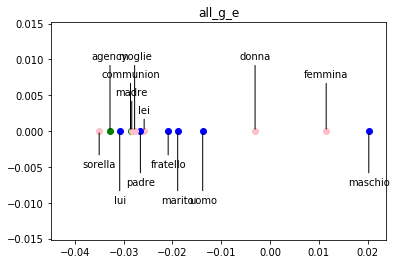

In [57]:
# all words plot g_e
fig, ax = plt.subplots()
ax.scatter([mean_agency_g_e, mean_communion_g_e], [0, 0], color='green')
plot_gender_pairs(ax, g_e, True)

ax.set_title('all_g_e')

plt.annotate('agency',
            xy=(mean_agency_g_e, 0),
            xytext=(mean_agency_g_e, 0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_g_e, 0),
            xytext=(mean_communion_g_e, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_all_g_e')

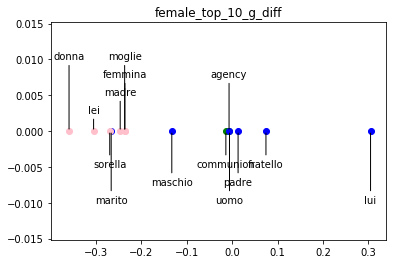

In [58]:
# female top 10 plot g_diff
fig, ax = plt.subplots()
ax.scatter([mean_agency_f_g_diff, mean_communion_f_g_diff], [0, 0], color='green')
plot_gender_pairs(ax, g_diff, False)

ax.set_title('female_top_10_g_diff')

plt.annotate('agency',
            xy=(mean_agency_f_g_diff, 0),
            xytext=(mean_agency_f_g_diff, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_f_g_diff, 0),
            xytext=(mean_communion_f_g_diff, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_f_g_diff')

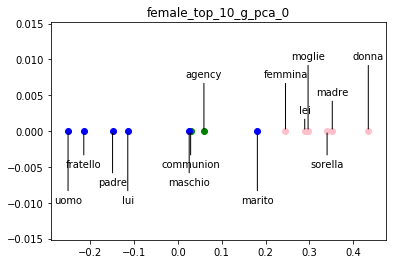

In [59]:
# female top 10 plot g_pca_0
fig, ax = plt.subplots()
ax.scatter([mean_agency_f_g_pca_0, mean_communion_f_g_pca_0], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_0, False)

ax.set_title('female_top_10_g_pca_0')

plt.annotate('agency',
            xy=(mean_agency_f_g_pca_0, 0),
            xytext=(mean_agency_f_g_pca_0, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_f_g_pca_0, 0),
            xytext=(mean_communion_f_g_pca_0, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_f_g_pca_0')

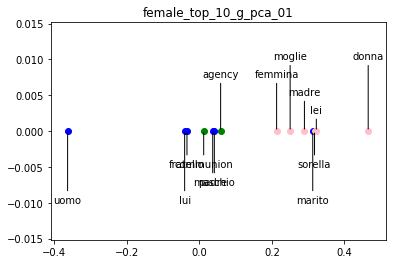

In [60]:
# female top 10 plot g_pca_01
fig, ax = plt.subplots()
ax.scatter([mean_agency_f_g_pca_01, mean_communion_f_g_pca_01], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_01, False)

ax.set_title('female_top_10_g_pca_01')

plt.annotate('agency',
            xy=(mean_agency_f_g_pca_01, 0),
            xytext=(mean_agency_f_g_pca_01, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_f_g_pca_01, 0),
            xytext=(mean_communion_f_g_pca_01, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_f_g_pca_01')

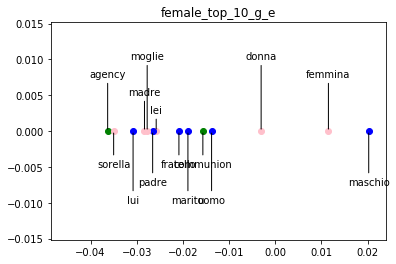

In [61]:
# female top 10 plot g_e
fig, ax = plt.subplots()
ax.scatter([mean_agency_f_g_e, mean_communion_f_g_e], [0, 0], color='green')
plot_gender_pairs(ax, g_e, True)

ax.set_title('female_top_10_g_e')

plt.annotate('agency',
            xy=(mean_agency_f_g_e, 0),
            xytext=(mean_agency_f_g_e, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_f_g_e, 0),
            xytext=(mean_communion_f_g_e, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_f_g_e')

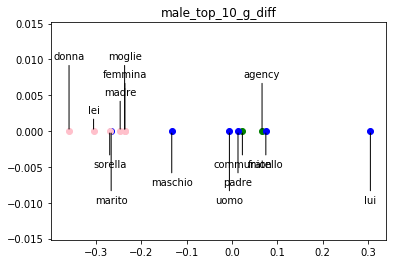

In [62]:
# male top 10 plot g_diff
fig, ax = plt.subplots()
ax.scatter([mean_agency_m_g_diff, mean_communion_m_g_diff], [0, 0], color='green')
plot_gender_pairs(ax, g_diff, False)

ax.set_title('male_top_10_g_diff')

plt.annotate('agency',
            xy=(mean_agency_m_g_diff, 0),
            xytext=(mean_agency_m_g_diff, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_m_g_diff, 0),
            xytext=(mean_communion_m_g_diff, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_m_g_diff')

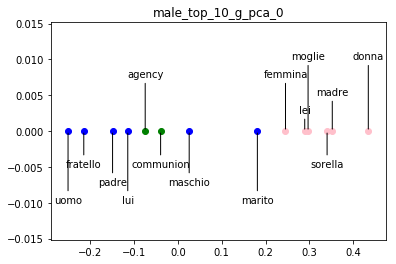

In [63]:
# male top 10 plot g_pca_0
fig, ax = plt.subplots()
ax.scatter([mean_agency_m_g_pca_0, mean_communion_m_g_pca_0], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_0, False)

ax.set_title('male_top_10_g_pca_0')

plt.annotate('agency',
            xy=(mean_agency_m_g_pca_0, 0),
            xytext=(mean_agency_m_g_pca_0, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_m_g_pca_0, 0),
            xytext=(mean_communion_m_g_pca_0, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_m_g_pca_0')

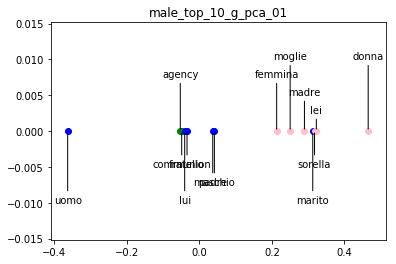

In [64]:
# male top 10 plot g_pca_01
fig, ax = plt.subplots()
ax.scatter([mean_agency_m_g_pca_01, mean_communion_m_g_pca_01], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_01, False)

ax.set_title('male_top_10_g_pca_01')

plt.annotate('agency',
            xy=(mean_agency_m_g_pca_01, 0),
            xytext=(mean_agency_m_g_pca_01, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_m_g_pca_01, 0),
            xytext=(mean_communion_m_g_pca_01, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_m_g_pca_01')

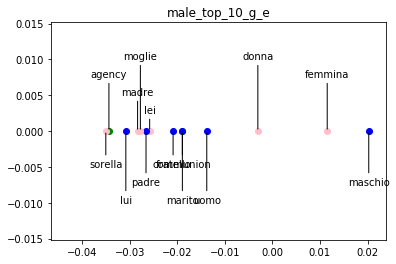

In [65]:
# male top 10 plot g_e
fig, ax = plt.subplots()
ax.scatter([mean_agency_m_g_e, mean_communion_m_g_e], [0, 0], color='green')
plot_gender_pairs(ax, g_e, True)

ax.set_title('male_top_10_g_e')

plt.annotate('agency',
            xy=(mean_agency_m_g_e, 0),
            xytext=(mean_agency_m_g_e, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_m_g_e, 0),
            xytext=(mean_communion_m_g_e, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_m_g_e')

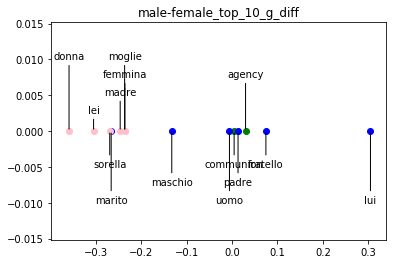

In [66]:
# male-female top 10 plot g_diff
fig, ax = plt.subplots()
ax.scatter([mean_agency_mf_g_diff, mean_communion_mf_g_diff], [0, 0], color='green')
plot_gender_pairs(ax, g_diff, False)

ax.set_title('male-female_top_10_g_diff')

plt.annotate('agency',
            xy=(mean_agency_mf_g_diff, 0),
            xytext=(mean_agency_mf_g_diff, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_mf_g_diff, 0),
            xytext=(mean_communion_mf_g_diff, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_mf_g_diff')

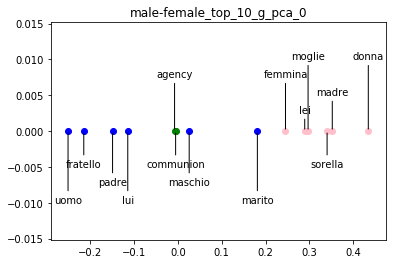

In [67]:
# male-female top 10 plot g_pca_0
fig, ax = plt.subplots()
ax.scatter([mean_agency_mf_g_pca_0, mean_communion_mf_g_pca_0], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_0, False)

ax.set_title('male-female_top_10_g_pca_0')

plt.annotate('agency',
            xy=(mean_agency_mf_g_pca_0, 0),
            xytext=(mean_agency_mf_g_pca_0, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_mf_g_pca_0, 0),
            xytext=(mean_communion_mf_g_pca_0, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_mf_g_pca_0')

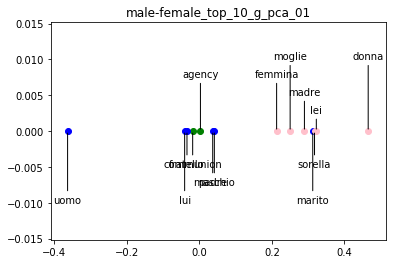

In [68]:
# male-female top 10 plot g_pca_01
fig, ax = plt.subplots()
ax.scatter([mean_agency_mf_g_pca_01, mean_communion_mf_g_pca_01], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_01, False)

ax.set_title('male-female_top_10_g_pca_01')

plt.annotate('agency',
            xy=(mean_agency_mf_g_pca_01, 0),
            xytext=(mean_agency_mf_g_pca_01, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_mf_g_pca_01, 0),
            xytext=(mean_communion_mf_g_pca_01, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_mf_g_pca_01')

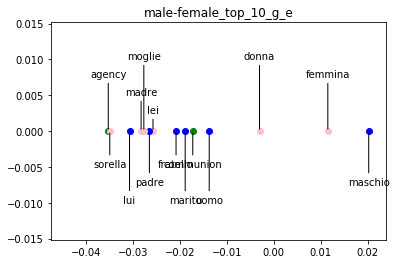

In [69]:
# male-female top 10 plot g_e
fig, ax = plt.subplots()
ax.scatter([mean_agency_mf_g_e, mean_communion_mf_g_e], [0, 0], color='green')
plot_gender_pairs(ax, g_e, True)

ax.set_title('male-female_top_10_g_e')

plt.annotate('agency',
            xy=(mean_agency_mf_g_e, 0),
            xytext=(mean_agency_mf_g_e, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_mf_g_e, 0),
            xytext=(mean_communion_mf_g_e, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_mf_g_e')

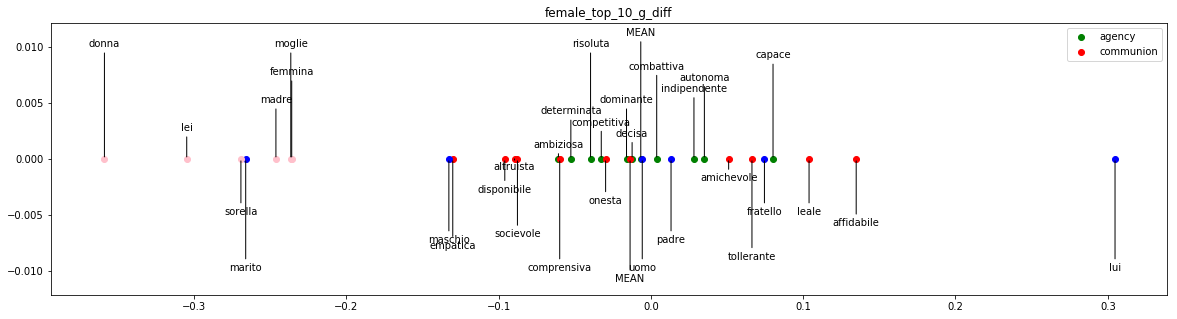

In [70]:
# female top 10 detailed plot g_diff
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_f_col1], np.zeros(len(agency_f_col1)), color='green', label='agency')
ax.scatter([communion_f_col1], np.zeros(len(communion_f_col1)), color='red', label='communion')
plot_gender_pairs(ax, g_diff, False)
ax.set_title('female_top_10_g_diff')
ax.legend(facecolor='white')

for i in range(len(agency_f_col0)):
    plt.annotate(agency_f_col0[i],
                xy=(agency_f_col1[i], 0),
                xytext=(agency_f_col1[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_f_col0[i],
                xy=(communion_f_col1[i], 0),
                xytext=(communion_f_col1[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_f_g_diff')

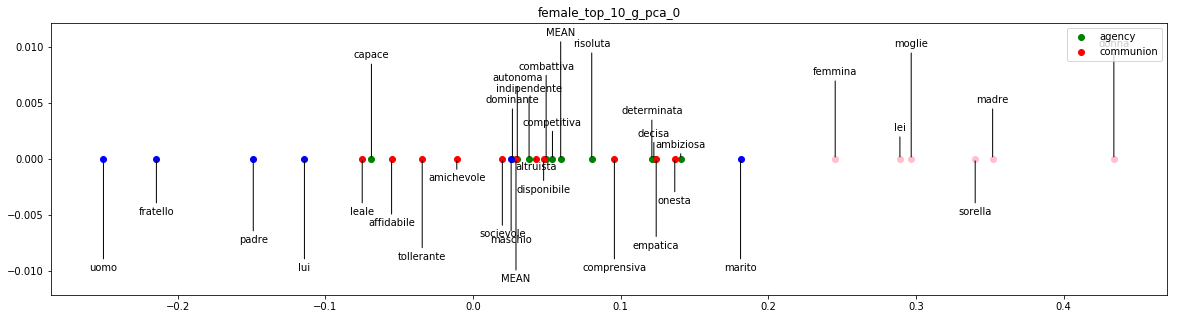

In [71]:
# female top 10 detailed plot g_pca_0
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_f_col2], np.zeros(len(agency_f_col2)), color='green', label='agency')
ax.scatter([communion_f_col2], np.zeros(len(communion_f_col2)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_0, False)
ax.set_title('female_top_10_g_pca_0')
ax.legend(facecolor='white')

for i in range(len(agency_f_col0)):
    plt.annotate(agency_f_col0[i],
                xy=(agency_f_col2[i], 0),
                xytext=(agency_f_col2[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_f_col0[i],
                xy=(communion_f_col2[i], 0),
                xytext=(communion_f_col2[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_f_g_pca_0')

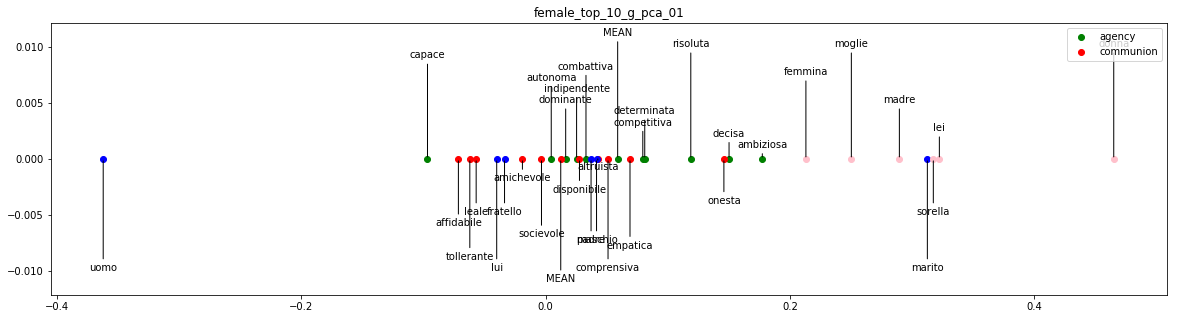

In [72]:
# female top 10 detailed plot g_pca_01
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_f_col3], np.zeros(len(agency_f_col3)), color='green', label='agency')
ax.scatter([communion_f_col3], np.zeros(len(communion_f_col3)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_01, False)
ax.set_title('female_top_10_g_pca_01')
ax.legend(facecolor='white')

for i in range(len(agency_f_col0)):
    plt.annotate(agency_f_col0[i],
                xy=(agency_f_col3[i], 0),
                xytext=(agency_f_col3[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_f_col0[i],
                xy=(communion_f_col3[i], 0),
                xytext=(communion_f_col3[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_f_g_pca_01')

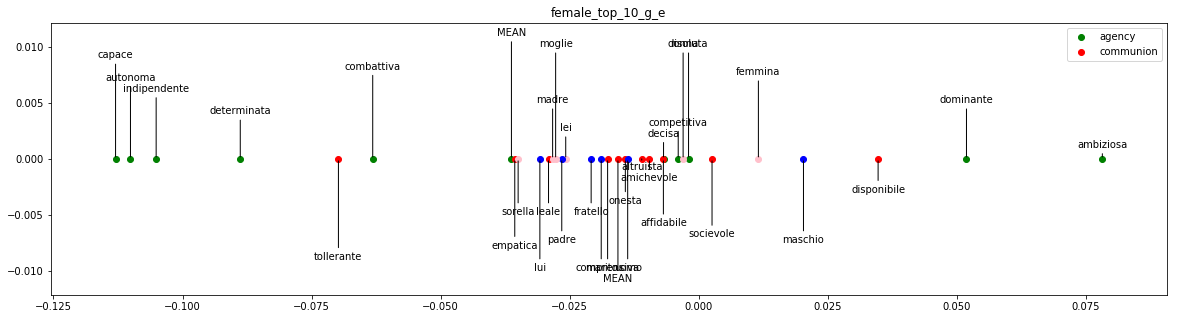

In [73]:
# female top 10 detailed plot g_e
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_f_col4], np.zeros(len(agency_f_col4)), color='green', label='agency')
ax.scatter([communion_f_col4], np.zeros(len(communion_f_col4)), color='red', label='communion')
plot_gender_pairs(ax, g_e, False)
ax.set_title('female_top_10_g_e')
ax.legend(facecolor='white')

for i in range(len(agency_f_col0)):
    plt.annotate(agency_f_col0[i],
                xy=(agency_f_col4[i], 0),
                xytext=(agency_f_col4[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_f_col0[i],
                xy=(communion_f_col4[i], 0),
                xytext=(communion_f_col4[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_f_g_e')

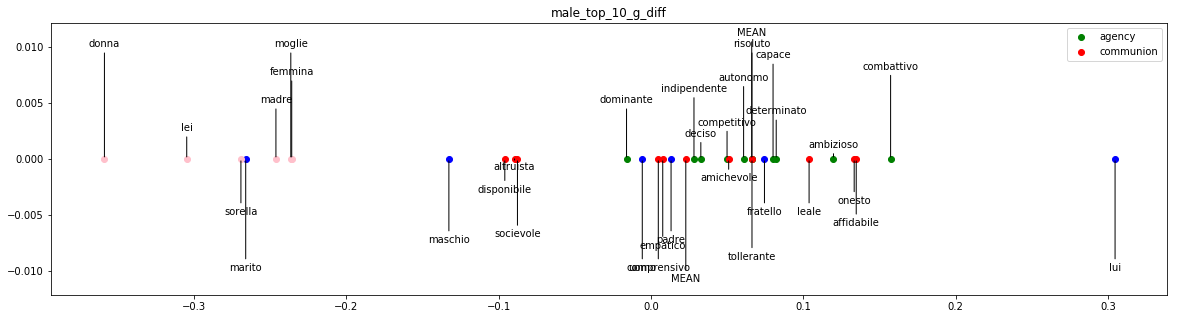

In [74]:
# male top 10 detailed plot g_diff
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_m_col1], np.zeros(len(agency_m_col1)), color='green', label='agency')
ax.scatter([communion_m_col1], np.zeros(len(communion_m_col1)), color='red', label='communion')
plot_gender_pairs(ax, g_diff, False)
ax.set_title('male_top_10_g_diff')
ax.legend(facecolor='white')

for i in range(len(agency_m_col0)):
    plt.annotate(agency_m_col0[i],
                xy=(agency_m_col1[i], 0),
                xytext=(agency_m_col1[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_m_col0[i],
                xy=(communion_m_col1[i], 0),
                xytext=(communion_m_col1[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_m_g_diff')

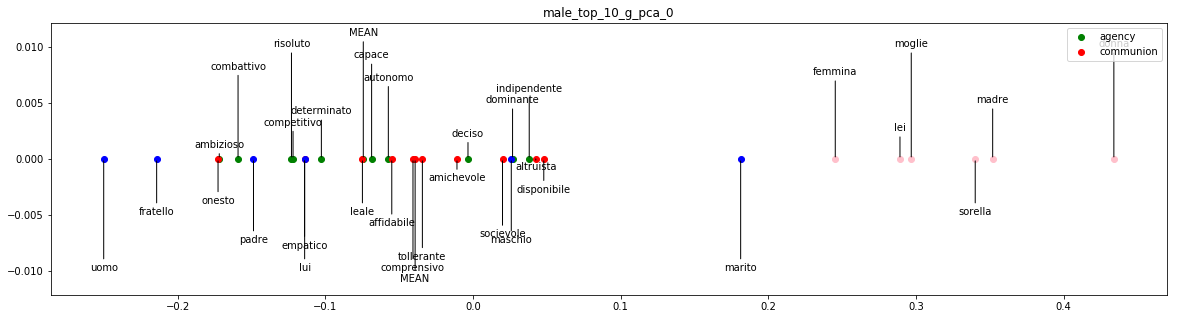

In [75]:
# male top 10 detailed plot g_pca_0
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_m_col2], np.zeros(len(agency_m_col2)), color='green', label='agency')
ax.scatter([communion_m_col2], np.zeros(len(communion_m_col2)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_0, False)
ax.set_title('male_top_10_g_pca_0')
ax.legend(facecolor='white')

for i in range(len(agency_m_col0)):
    plt.annotate(agency_m_col0[i],
                xy=(agency_m_col2[i], 0),
                xytext=(agency_m_col2[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_m_col0[i],
                xy=(communion_m_col2[i], 0),
                xytext=(communion_m_col2[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_m_g_pca_0')

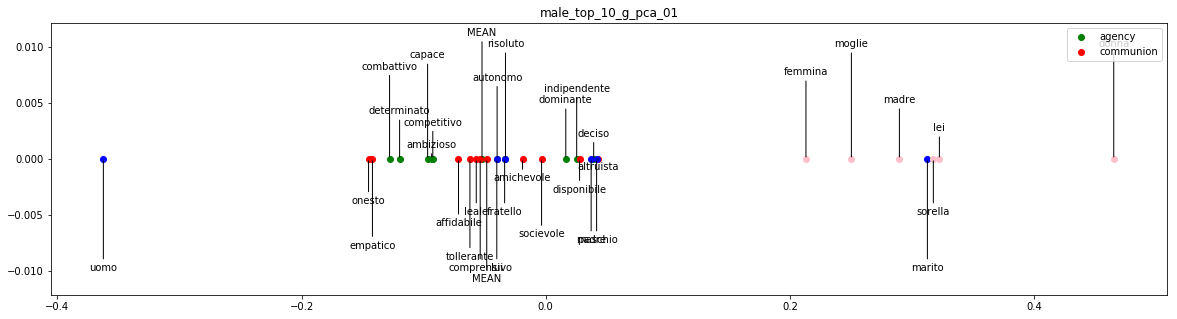

In [76]:
# male top 10 detailed plot g_pca_01
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_m_col3], np.zeros(len(agency_m_col3)), color='green', label='agency')
ax.scatter([communion_m_col3], np.zeros(len(communion_m_col3)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_01, False)
ax.set_title('male_top_10_g_pca_01')
ax.legend(facecolor='white')

for i in range(len(agency_m_col0)):
    plt.annotate(agency_m_col0[i],
                xy=(agency_m_col3[i], 0),
                xytext=(agency_m_col3[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_m_col0[i],
                xy=(communion_m_col3[i], 0),
                xytext=(communion_m_col3[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_m_g_pca_01')

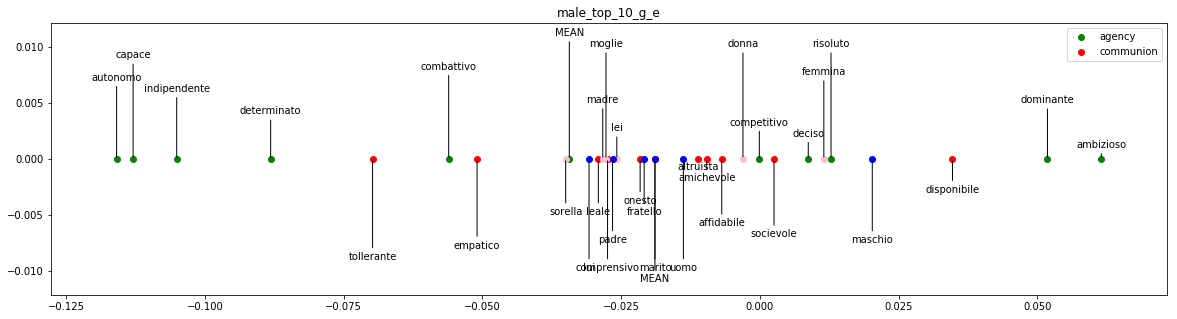

In [77]:
# male top 10 detailed plot g_e
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_m_col4], np.zeros(len(agency_m_col4)), color='green', label='agency')
ax.scatter([communion_m_col4], np.zeros(len(communion_m_col4)), color='red', label='communion')
plot_gender_pairs(ax, g_e, False)
ax.set_title('male_top_10_g_e')
ax.legend(facecolor='white')

for i in range(len(agency_m_col0)):
    plt.annotate(agency_m_col0[i],
                xy=(agency_m_col4[i], 0),
                xytext=(agency_m_col4[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_m_col0[i],
                xy=(communion_m_col4[i], 0),
                xytext=(communion_m_col4[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_m_g_e')

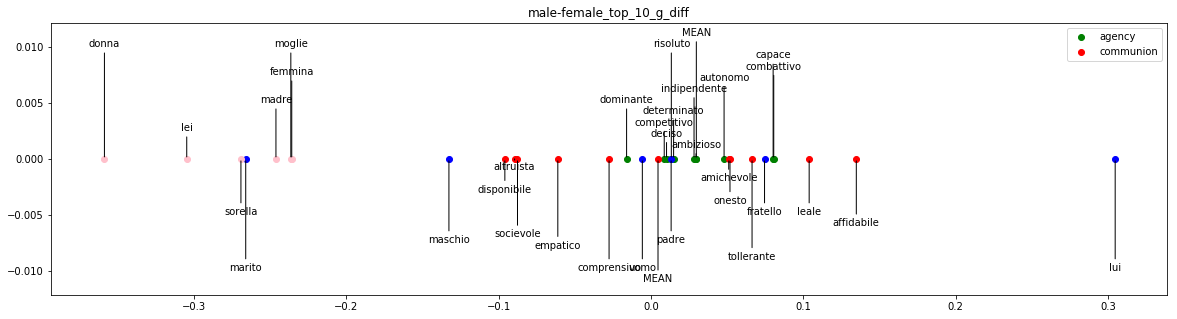

In [78]:
# male-female top 10 detailed plot g_diff
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_mf_col1], np.zeros(len(agency_mf_col1)), color='green', label='agency')
ax.scatter([communion_mf_col1], np.zeros(len(communion_mf_col1)), color='red', label='communion')
plot_gender_pairs(ax, g_diff, False)
ax.set_title('male-female_top_10_g_diff')
ax.legend(facecolor='white')

for i in range(len(agency_mf_col0)):
    plt.annotate(agency_mf_col0[i],
                xy=(agency_mf_col1[i], 0),
                xytext=(agency_mf_col1[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_mf_col0[i],
                xy=(communion_mf_col1[i], 0),
                xytext=(communion_mf_col1[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_mf_g_diff')

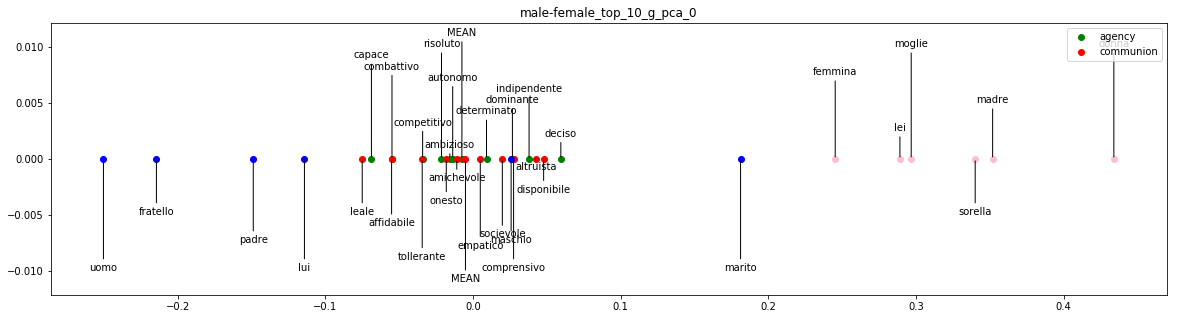

In [79]:
# male-female top 10 detailed plot g_pca_0
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_mf_col2], np.zeros(len(agency_mf_col2)), color='green', label='agency')
ax.scatter([communion_mf_col2], np.zeros(len(communion_mf_col2)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_0, False)
ax.set_title('male-female_top_10_g_pca_0')
ax.legend(facecolor='white')

for i in range(len(agency_mf_col0)):
    plt.annotate(agency_mf_col0[i],
                xy=(agency_mf_col2[i], 0),
                xytext=(agency_mf_col2[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_mf_col0[i],
                xy=(communion_mf_col2[i], 0),
                xytext=(communion_mf_col2[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_mf_g_pca_0')

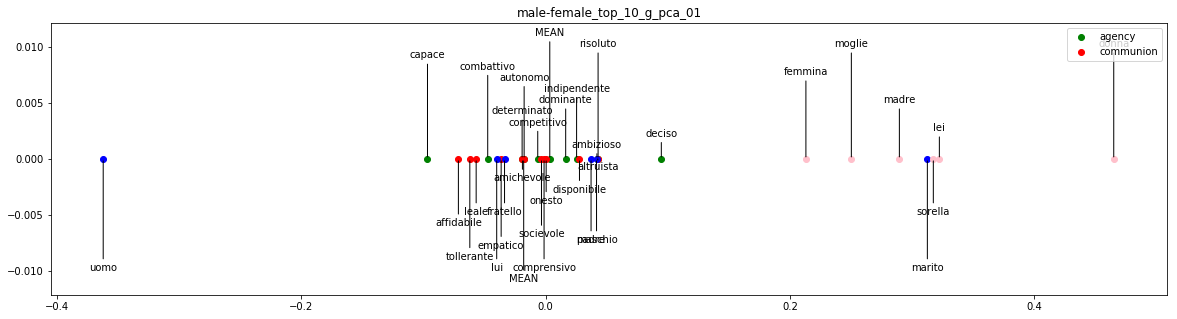

In [80]:
# male-female top 10 detailed plot g_pca_01
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_mf_col3], np.zeros(len(agency_mf_col3)), color='green', label='agency')
ax.scatter([communion_mf_col3], np.zeros(len(communion_mf_col3)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_01, False)
ax.set_title('male-female_top_10_g_pca_01')
ax.legend(facecolor='white')

for i in range(len(agency_mf_col0)):
    plt.annotate(agency_mf_col0[i],
                xy=(agency_mf_col3[i], 0),
                xytext=(agency_mf_col3[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_mf_col0[i],
                xy=(communion_mf_col3[i], 0),
                xytext=(communion_mf_col3[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_mf_g_pca_01')

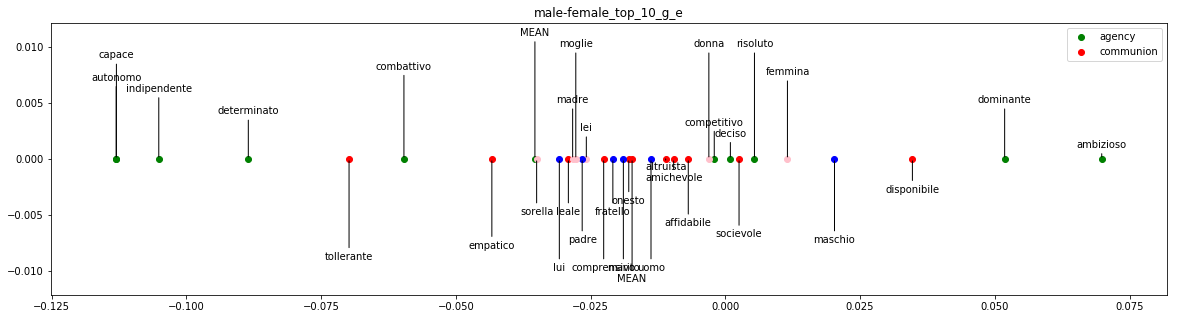

In [81]:
# male-female top 10 detailed plot g_e
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_mf_col4], np.zeros(len(agency_mf_col4)), color='green', label='agency')
ax.scatter([communion_mf_col4], np.zeros(len(communion_mf_col4)), color='red', label='communion')
plot_gender_pairs(ax, g_e, False)
ax.set_title('male-female_top_10_g_e')
ax.legend(facecolor='white')

for i in range(len(agency_mf_col0)):
    plt.annotate(agency_mf_col0[i],
                xy=(agency_mf_col4[i], 0),
                xytext=(agency_mf_col4[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_mf_col0[i],
                xy=(communion_mf_col4[i], 0),
                xytext=(communion_mf_col4[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_mf_g_e')

#### Step 2.7: subtracting grammatical gender to the emdeddings

In [82]:
from debiaswe.debias import debias

In [83]:
debias(E_ft, [], G_word, [])

425 words of dimension 300 : sua, suo, prima, italiano, ..., agrotecnico, credulona, calzolaia, supportivo
set()
425 words of dimension 300 : sua, suo, prima, italiano, ..., agrotecnico, credulona, calzolaia, supportivo


#### Step 2.7: repeating Steps 2.1-2.6

In [84]:
# gender direction
g_diff = E_ft.diff('lui', 'lei')

In [85]:
# list of pairs to define gender
gender_pairs = [['lui','lei'],
                ['uomo','donna'], 
                ['padre','madre'],
                ['marito','moglie'],
                ['fratello','sorella'],
                ['maschio','femmina']]

In [86]:
# PCA
pca = we.doPCA(gender_pairs, E_ft)

# PCA components
pc = pca.components_

# singular values
sv = pca.singular_values_

In [87]:
print("Singular values:")
print(sv)

Singular values:
[7.2583288e-01 4.8852363e-01 3.9915085e-01 3.5123977e-01 3.3286557e-01
 2.6009700e-01 7.1481601e-08 5.7407664e-08 4.5535760e-08 4.1550784e-08]


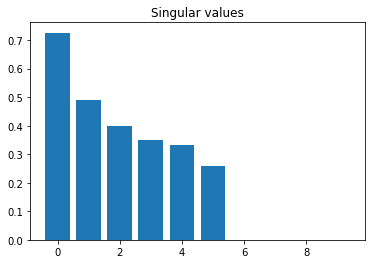

In [88]:
plt.bar(range(pca.n_components_), sv)
plt.title("Singular values")
plt.show()

In [89]:
# gender direction
g_pca_0  = pc[0]/LA.norm(pc[0])
g_pca_01 = (sv[0]*pc[0]+sv[1]*pc[1])/(sv[0]+sv[1])/LA.norm((sv[0]*pc[0]+sv[1]*pc[1])/(sv[0]+sv[1]))

In [90]:
S_word = [['lui','lei'],
          ['uomo','donna'], 
          ['padre','madre'],
          ['marito','moglie'],
          ['fratello','sorella'],
          ['maschio','femmina']]

G_word = db.read('gram_def_mf.txt', 'mf')

In [91]:
S_m_v = []
for w in S_word:
    S_m_v.append(E_ft.v(w[1]))
    
S_f_v = []
for w in S_word:
    S_f_v.append(E_ft.v(w[0]))
    
G_m_v = []
for w in G_word:
    G_m_v.append(E_ft.v(w[0]))
    
G_f_v = []
for w in G_word:
    G_f_v.append(E_ft.v(w[1]))

S_m = np.array(S_m_v).T
S_f = np.array(S_f_v).T
G_m = np.array(G_m_v).T
G_f = np.array(G_f_v).T

In [92]:
# delta semantic
Delta_S = np.dot(np.subtract(S_m, S_f), np.subtract(S_m, S_f).T)

# delta grammatical
Delta_G = np.dot(np.subtract(G_m, G_f), np.subtract(G_m, G_f).T)

# A
A = np.dot(np.linalg.inv(Delta_G), Delta_S)

In [93]:
# eigenvalues and eigenvectors
w, v = np.linalg.eig(A)

# gender direction: pick the eigenvector associated to the largest eigenvalue
g_e = v[:,np.argmax(w)] # already normalized

In [94]:
# compute projections
# all words
proj_agency_g_diff =  db.prof_proj(E_ft, agency, g_diff, 'ag-com')
proj_agency_g_pca_0 =  db.prof_proj(E_ft, agency, g_pca_0, 'ag-com')
proj_agency_g_pca_01 =  db.prof_proj(E_ft, agency, g_pca_01, 'ag-com')
proj_agency_g_e =  db.prof_proj(E_ft, agency, g_e, 'ag-com')

proj_communion_g_diff =  db.prof_proj(E_ft, communion, g_diff, 'ag-com')
proj_communion_g_pca_0 =  db.prof_proj(E_ft, communion, g_pca_0, 'ag-com')
proj_communion_g_pca_01 =  db.prof_proj(E_ft, communion, g_pca_01, 'ag-com')
proj_communion_g_e =  db.prof_proj(E_ft, communion, g_e, 'ag-com')

# female top 10
proj_agency_f_g_diff =  db.prof_proj(E_ft, agency_mf_top_10, g_diff, 'ag-com-f')
proj_agency_f_g_pca_0 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_0, 'ag-com-f')
proj_agency_f_g_pca_01 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_01, 'ag-com-f')
proj_agency_f_g_e =  db.prof_proj(E_ft, agency_mf_top_10, g_e, 'ag-com-f')

proj_communion_f_g_diff =  db.prof_proj(E_ft, communion_mf_top_10, g_diff, 'ag-com-f')
proj_communion_f_g_pca_0 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_0, 'ag-com-f')
proj_communion_f_g_pca_01 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_01, 'ag-com-f')
proj_communion_f_g_e =  db.prof_proj(E_ft, communion_mf_top_10, g_e, 'ag-com-f')

# male top 10
proj_agency_m_g_diff =  db.prof_proj(E_ft, agency_mf_top_10, g_diff, 'ag-com-m')
proj_agency_m_g_pca_0 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_0, 'ag-com-m')
proj_agency_m_g_pca_01 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_01, 'ag-com-m')
proj_agency_m_g_e =  db.prof_proj(E_ft, agency_mf_top_10, g_e, 'ag-com-m')

proj_communion_m_g_diff =  db.prof_proj(E_ft, communion_mf_top_10, g_diff, 'ag-com-m')
proj_communion_m_g_pca_0 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_0, 'ag-com-m')
proj_communion_m_g_pca_01 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_01, 'ag-com-m')
proj_communion_m_g_e =  db.prof_proj(E_ft, communion_mf_top_10, g_e, 'ag-com-m')

# male-female top 10
proj_agency_mf_g_diff =  db.prof_proj(E_ft, agency_mf_top_10, g_diff, 'ag-com-mf')
proj_agency_mf_g_pca_0 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_0, 'ag-com-mf')
proj_agency_mf_g_pca_01 =  db.prof_proj(E_ft, agency_mf_top_10, g_pca_01, 'ag-com-mf')
proj_agency_mf_g_e =  db.prof_proj(E_ft, agency_mf_top_10, g_e, 'ag-com-mf')

proj_communion_mf_g_diff =  db.prof_proj(E_ft, communion_mf_top_10, g_diff, 'ag-com-mf')
proj_communion_mf_g_pca_0 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_0, 'ag-com-mf')
proj_communion_mf_g_pca_01 =  db.prof_proj(E_ft, communion_mf_top_10, g_pca_01, 'ag-com-mf')
proj_communion_mf_g_e =  db.prof_proj(E_ft, communion_mf_top_10, g_e, 'ag-com-mf')

In [95]:
# print agency results
# all words
agency_col0 = [] # pandas columns
agency_col1 = []
agency_col2 = []
agency_col3 = []
agency_col4 = []
agency_col5 = []


for i in range(len(proj_agency_g_diff)):
    agency_col0.append(proj_agency_g_diff[i][0]) # word
    agency_col1.append(proj_agency_g_diff[i][1]) # projection on g_diff
    agency_col2.append(proj_agency_g_pca_0[i][1]) # projection on g_pca_0
    agency_col3.append(proj_agency_g_pca_01[i][1]) # projection on g_pca_01
    agency_col4.append(np.real(proj_agency_g_e[i][1])) # projection on g_e
    agency_col5.append(proj_agency_g_diff[i][2]) # agency score
    
mean_agency_g_diff = np.mean(agency_col1)
mean_agency_g_pca_0 = np.mean(agency_col2)
mean_agency_g_pca_01 = np.mean(agency_col3)
mean_agency_g_e = np.mean(agency_col4)
mean_agency_score = np.mean(agency_col5)

agency_col0.append('MEAN')
agency_col1.append(mean_agency_g_diff)
agency_col2.append(mean_agency_g_pca_0)
agency_col3.append(mean_agency_g_pca_01)
agency_col4.append(mean_agency_g_e)
agency_col5.append(mean_agency_score)

agency_data = {'Word':agency_col0, 
               'Proj g_diff':agency_col1,
               'Proj g_pca_0':agency_col2, 
               'Proj g_pca_01':agency_col3,
               'Proj g_e':agency_col4,
               'Agency':agency_col5}

agency_table = pd.DataFrame(agency_data)
agency_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency
0,abile,0.091597,0.110417,0.067487,0.049583,2.320000
1,attivo,0.106643,0.106760,0.068515,-0.081389,2.350000
2,ambizioso,0.077781,0.086066,0.019502,-0.019807,2.790000
3,deciso,0.020371,-0.029103,-0.065776,-0.044848,2.880000
4,vanitoso,-0.060925,-0.066567,-0.069075,0.023809,1.290000
5,capace,0.069480,0.049053,0.081890,-0.046876,2.450000
6,competente,0.105852,0.023342,-0.019695,-0.046294,2.210000
7,competitivo,0.005824,0.036513,0.026547,-0.022337,2.710000
8,presuntuoso,0.040173,-0.012222,-0.008203,0.048774,1.530000
9,creativo,-0.053798,-0.041574,-0.030098,-0.017617,1.630000


In [96]:
# agency pearson correlation
r_agency_g_diff = scipy.stats.pearsonr(agency_col5, agency_col1)[0]
r_agency_g_pca_0 = scipy.stats.pearsonr(agency_col5, agency_col2)[0]
r_agency_g_pca_01 = scipy.stats.pearsonr(agency_col5, agency_col3)[0]
r_agency_g_e = scipy.stats.pearsonr(agency_col5, agency_col4)[0]

In [97]:
pearson_data = {'g_diff':r_agency_g_diff,
                'g_pca_0':r_agency_g_pca_0,
                'g_pca_01':r_agency_g_pca_01,
                'g_e':r_agency_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,0.478291,0.511798,0.270207,-0.283888


In [98]:
# print communion results
# all words
communion_col0 = [] # pandas columns
communion_col1 = []
communion_col2 = []
communion_col3 = []
communion_col4 = []
communion_col5 = []

for i in range(len(proj_communion_g_diff)):
    communion_col0.append(proj_communion_g_diff[i][0]) # word
    communion_col1.append(proj_communion_g_diff[i][1]) # projection on g_diff
    communion_col2.append(proj_communion_g_pca_0[i][1]) # projection on g_pca_0
    communion_col3.append(proj_communion_g_pca_01[i][1]) # projection on g_pca_01
    communion_col4.append(np.real(proj_communion_g_e[i][1])) # projection on g_e
    communion_col5.append(proj_communion_g_diff[i][2]) # communion score
    
mean_communion_g_diff = np.mean(communion_col1)
mean_communion_g_pca_0 = np.mean(communion_col2)
mean_communion_g_pca_01 = np.mean(communion_col3)
mean_communion_g_e = np.mean(communion_col4)
mean_communion_score = np.mean(communion_col5)

communion_col0.append('MEAN')
communion_col1.append(mean_communion_g_diff)
communion_col2.append(mean_communion_g_pca_0)
communion_col3.append(mean_communion_g_pca_01)
communion_col4.append(mean_communion_g_e)
communion_col5.append(mean_communion_score)

communion_data = {'Word':communion_col0, 
               'Proj g_diff':communion_col1,
               'Proj g_pca_0':communion_col2, 
               'Proj g_pca_01':communion_col3,
               'Proj g_e':communion_col4,
               'communion':communion_col5}

communion_table = pd.DataFrame(communion_data)
communion_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,communion
0,affettuoso,-0.095857,-0.143509,-0.089669,0.001237,1.580000
1,altruista,-0.096017,-0.061087,-0.054242,0.055994,2.500000
2,comunicativo,0.008972,-0.028733,0.021718,0.029668,2.000000
3,coscienzioso,0.101009,0.017462,0.011324,0.009806,1.320000
4,rispettoso,0.064831,0.051287,0.069426,0.050109,1.550000
5,coerente,0.087345,0.043290,0.076583,0.085887,1.680000
6,emotivo,-0.089888,-0.094859,-0.082995,-0.025865,1.370000
7,giusto,0.032882,0.001316,-0.013873,0.046032,1.950000
8,amichevole,0.054774,0.016603,0.022392,-0.062945,2.230000
9,disponibile,-0.103989,-0.064604,-0.035838,0.015749,2.760000


In [99]:
# communion pearson correlation
r_communion_g_diff = scipy.stats.pearsonr(communion_col5, communion_col1)[0]
r_communion_g_pca_0 = scipy.stats.pearsonr(communion_col5, communion_col2)[0]
r_communion_g_pca_01 = scipy.stats.pearsonr(communion_col5, communion_col3)[0]
r_communion_g_e = scipy.stats.pearsonr(communion_col5, communion_col4)[0]

In [100]:
pearson_data = {'g_diff':r_communion_g_diff,
                'g_pca_0':r_communion_g_pca_0,
                'g_pca_01':r_communion_g_pca_01,
                'g_e':r_communion_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,0.01311,0.132307,0.160138,0.26866


In [101]:
# print agency results
# female top 10
agency_f_col0 = [] # pandas columns
agency_f_col1 = []
agency_f_col2 = []
agency_f_col3 = []
agency_f_col4 = []
agency_f_col5 = []
agency_f_col6 = []

for i in range(len(proj_agency_f_g_diff)):
    agency_f_col0.append(proj_agency_f_g_diff[i][0]) # word
    agency_f_col1.append(proj_agency_f_g_diff[i][1]) # projection on g_diff
    agency_f_col2.append(proj_agency_f_g_pca_0[i][1]) # projection on g_pca_0
    agency_f_col3.append(proj_agency_f_g_pca_01[i][1]) # projection on g_pca_01
    agency_f_col4.append(np.real(proj_agency_f_g_e[i][1])) # projection on g_e
    agency_f_col5.append(proj_agency_f_g_diff[i][2]) # agency_f score
    agency_f_col6.append(proj_agency_f_g_diff[i][3]) # communion_f score

    
mean_agency_f_g_diff = np.mean(agency_f_col1)
mean_agency_f_g_pca_0 = np.mean(agency_f_col2)
mean_agency_f_g_pca_01 = np.mean(agency_f_col3)
mean_agency_f_g_e = np.mean(agency_f_col4)
mean_agency_f_score1 = np.mean(agency_f_col5)
mean_agency_f_score2 = np.mean(agency_f_col6)

agency_f_col0.append('MEAN')
agency_f_col1.append(mean_agency_f_g_diff)
agency_f_col2.append(mean_agency_f_g_pca_0)
agency_f_col3.append(mean_agency_f_g_pca_01)
agency_f_col4.append(mean_agency_f_g_e)
agency_f_col5.append(mean_agency_f_score1)
agency_f_col6.append(mean_agency_f_score2)

agency_f_data = {'Word':agency_f_col0, 
               'Proj g_diff':agency_f_col1,
               'Proj g_pca_0':agency_f_col2, 
               'Proj g_pca_01':agency_f_col3,
               'Proj g_e':agency_f_col4,
               'Agency':agency_f_col5,
               'Communion':agency_f_col6}

agency_f_table = pd.DataFrame(agency_f_data)
agency_f_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,ambiziosa,0.002107,-0.026248,-0.100431,0.026831,2.790,-0.970
1,decisa,0.049625,-0.013272,-0.075387,-0.028183,2.880,0.430
2,competitiva,0.003590,0.015638,-0.032490,-0.002047,2.710,-1.390
3,determinata,0.005682,-0.010033,0.003268,-0.002463,2.730,0.530
4,dominante,0.000686,0.004070,0.006493,0.001854,2.760,-1.890
5,indipendente,0.042854,-0.013392,-0.006820,-0.058949,2.650,-0.830
6,autonoma,0.074301,0.045569,0.050425,-0.030505,2.760,-0.470
7,combattiva,0.049277,0.038116,0.029972,0.057559,2.550,0.350
8,capace,0.069480,0.049053,0.081890,-0.046876,2.450,1.080
9,risoluta,-0.000897,-0.011380,-0.072728,0.071842,2.480,0.030


In [102]:
# agency pearson correlation
r_agency_f_g_diff = scipy.stats.pearsonr(agency_f_col5, agency_f_col1)[0]
r_agency_f_g_pca_0 = scipy.stats.pearsonr(agency_f_col5, agency_f_col2)[0]
r_agency_f_g_pca_01 = scipy.stats.pearsonr(agency_f_col5, agency_f_col3)[0]
r_agency_f_g_e = scipy.stats.pearsonr(agency_f_col5, agency_f_col4)[0]

In [103]:
pearson_data = {'g_diff':r_agency_f_g_diff,
                'g_pca_0':r_agency_f_g_pca_0,
                'g_pca_01':r_agency_f_g_pca_01,
                'g_e':r_agency_f_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.149258,-0.423939,-0.413882,-0.266299


In [104]:
# agency pearson correlation ag-com
r_agency_f_g_diff = scipy.stats.pearsonr(np.array(agency_f_col5)-np.array(agency_f_col6), agency_f_col1)[0]
r_agency_f_g_pca_0 = scipy.stats.pearsonr(np.array(agency_f_col5)-np.array(agency_f_col6), agency_f_col2)[0]
r_agency_f_g_pca_01 = scipy.stats.pearsonr(np.array(agency_f_col5)-np.array(agency_f_col6), agency_f_col3)[0]
r_agency_f_g_e = scipy.stats.pearsonr(np.array(agency_f_col5)-np.array(agency_f_col6), agency_f_col4)[0]

In [105]:
pearson_data = {'g_diff':r_agency_f_g_diff,
                'g_pca_0':r_agency_f_g_pca_0,
                'g_pca_01':r_agency_f_g_pca_01,
                'g_e':r_agency_f_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.48943,-0.316061,-0.321347,-0.015028


In [106]:
# print communion results
# female top 10
communion_f_col0 = [] # pandas columns
communion_f_col1 = []
communion_f_col2 = []
communion_f_col3 = []
communion_f_col4 = []
communion_f_col5 = []
communion_f_col6 = []

for i in range(len(proj_communion_f_g_diff)):
    communion_f_col0.append(proj_communion_f_g_diff[i][0]) # word
    communion_f_col1.append(proj_communion_f_g_diff[i][1]) # projection on g_diff
    communion_f_col2.append(proj_communion_f_g_pca_0[i][1]) # projection on g_pca_0
    communion_f_col3.append(proj_communion_f_g_pca_01[i][1]) # projection on g_pca_01
    communion_f_col4.append(np.real(proj_communion_f_g_e[i][1])) # projection on g_e
    communion_f_col5.append(proj_communion_f_g_diff[i][2]) # communion_f score
    communion_f_col6.append(proj_communion_f_g_diff[i][3]) # communion_f score
    
mean_communion_f_g_diff = np.mean(communion_f_col1)
mean_communion_f_g_pca_0 = np.mean(communion_f_col2)
mean_communion_f_g_pca_01 = np.mean(communion_f_col3)
mean_communion_f_g_e = np.mean(communion_f_col4)
mean_communion_f_score1 = np.mean(communion_f_col5)
mean_communion_f_score2 = np.mean(communion_f_col6)

communion_f_col0.append('MEAN')
communion_f_col1.append(mean_communion_f_g_diff)
communion_f_col2.append(mean_communion_f_g_pca_0)
communion_f_col3.append(mean_communion_f_g_pca_01)
communion_f_col4.append(mean_communion_f_g_e)
communion_f_col5.append(mean_communion_f_score1)
communion_f_col6.append(mean_communion_f_score2)

communion_f_data = {'Word':communion_f_col0, 
               'Proj g_diff':communion_f_col1,
               'Proj g_pca_0':communion_f_col2, 
               'Proj g_pca_01':communion_f_col3,
               'Proj g_e':communion_f_col4,
               'Agency':communion_f_col5,
               'Communion':communion_f_col6}

communion_f_table = pd.DataFrame(communion_f_data)
communion_f_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,altruista,-0.096017,-0.061087,-0.054242,0.055994,-1.180,2.500
1,amichevole,0.054774,0.016603,0.022392,-0.062945,0.150,2.230
2,disponibile,-0.103989,-0.064604,-0.035838,0.015749,-0.420,2.760
3,onesta,0.019494,-0.051748,-0.085183,0.098465,-0.710,2.340
4,leale,0.091348,0.046515,0.031960,0.052940,-0.880,2.280
5,affidabile,0.129393,0.043327,0.061338,0.024746,0.450,2.210
6,socievole,-0.096330,-0.039105,-0.007269,0.016870,0.660,2.710
7,empatica,-0.086448,-0.035279,0.001743,-0.039606,-0.530,2.210
8,tollerante,0.063575,0.028879,0.058773,0.051808,-0.340,2.630
9,comprensiva,-0.010728,0.000103,0.023384,0.064215,-0.370,2.450


In [107]:
# communion pearson correlation
r_communion_f_g_diff = scipy.stats.pearsonr(communion_f_col6, communion_f_col1)[0]
r_communion_f_g_pca_0 = scipy.stats.pearsonr(communion_f_col6, communion_f_col2)[0]
r_communion_f_g_pca_01 = scipy.stats.pearsonr(communion_f_col6, communion_f_col3)[0]
r_communion_f_g_e = scipy.stats.pearsonr(communion_f_col6, communion_f_col4)[0]

In [108]:
pearson_data = {'g_diff':r_communion_f_g_diff,
                'g_pca_0':r_communion_f_g_pca_0,
                'g_pca_01':r_communion_f_g_pca_01,
                'g_e':r_communion_f_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.548441,-0.458119,-0.229765,0.259404


In [109]:
# communion pearson correlation ag-com
r_communion_f_g_diff = scipy.stats.pearsonr(np.array(communion_f_col5)-np.array(communion_f_col6), communion_f_col1)[0]
r_communion_f_g_pca_0 = scipy.stats.pearsonr(np.array(communion_f_col5)-np.array(communion_f_col6), communion_f_col2)[0]
r_communion_f_g_pca_01 = scipy.stats.pearsonr(np.array(communion_f_col5)-np.array(communion_f_col6), communion_f_col3)[0]
r_communion_f_g_e = scipy.stats.pearsonr(np.array(communion_f_col5)-np.array(communion_f_col6), communion_f_col4)[0]

In [110]:
pearson_data = {'g_diff':r_communion_f_g_diff,
                'g_pca_0':r_communion_f_g_pca_0,
                'g_pca_01':r_communion_f_g_pca_01,
                'g_e':r_communion_f_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,0.364999,0.426177,0.514504,-0.500479


In [111]:
# print agency results
# male top 10
agency_m_col0 = [] # pandas columns
agency_m_col1 = []
agency_m_col2 = []
agency_m_col3 = []
agency_m_col4 = []
agency_m_col5 = []
agency_m_col6 = []


for i in range(len(proj_agency_m_g_diff)):
    agency_m_col0.append(proj_agency_m_g_diff[i][0]) # word
    agency_m_col1.append(proj_agency_m_g_diff[i][1]) # projection on g_diff
    agency_m_col2.append(proj_agency_m_g_pca_0[i][1]) # projection on g_pca_0
    agency_m_col3.append(proj_agency_m_g_pca_01[i][1]) # projection on g_pca_01
    agency_m_col4.append(np.real(proj_agency_m_g_e[i][1])) # projection on g_e
    agency_m_col5.append(proj_agency_m_g_diff[i][2]) # agency_f score
    agency_m_col6.append(proj_agency_m_g_diff[i][3]) # agency_f score
    
mean_agency_m_g_diff = np.mean(agency_m_col1)
mean_agency_m_g_pca_0 = np.mean(agency_m_col2)
mean_agency_m_g_pca_01 = np.mean(agency_m_col3)
mean_agency_m_g_e = np.mean(agency_m_col4)
mean_agency_m_score1 = np.mean(agency_m_col5)
mean_agency_m_score2 = np.mean(agency_m_col6)

agency_m_col0.append('MEAN')
agency_m_col1.append(mean_agency_m_g_diff)
agency_m_col2.append(mean_agency_m_g_pca_0)
agency_m_col3.append(mean_agency_m_g_pca_01)
agency_m_col4.append(mean_agency_m_g_e)
agency_m_col5.append(mean_agency_m_score1)
agency_m_col6.append(mean_agency_m_score2)

agency_m_data = {'Word':agency_m_col0, 
               'Proj g_diff':agency_m_col1,
               'Proj g_pca_0':agency_m_col2, 
               'Proj g_pca_01':agency_m_col3,
               'Proj g_e':agency_m_col4,
               'Agency':agency_m_col5,
               'Communion':agency_m_col6}

agency_m_table = pd.DataFrame(agency_m_data)
agency_m_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,ambizioso,0.077781,0.086066,0.019502,-0.019807,2.790,-0.970
1,deciso,0.020371,-0.029103,-0.065776,-0.044848,2.880,0.430
2,competitivo,0.005824,0.036513,0.026547,-0.022337,2.710,-1.390
3,determinato,0.041673,0.021000,0.060830,-0.037571,2.730,0.530
4,dominante,0.000686,0.004070,0.006493,0.001854,2.760,-1.890
5,indipendente,0.042854,-0.013392,-0.006820,-0.058949,2.650,-0.830
6,autonomo,0.032701,-0.002410,-0.005225,-0.032096,2.760,-0.470
7,combattivo,0.124401,0.091814,0.071985,0.040573,2.550,0.350
8,capace,0.069480,0.049053,0.081890,-0.046876,2.450,1.080
9,risoluto,0.025668,0.036776,-0.040184,0.069130,2.480,0.030


In [112]:
# agency pearson correlation
r_agency_m_g_diff = scipy.stats.pearsonr(agency_m_col5, agency_m_col1)[0]
r_agency_m_g_pca_0 = scipy.stats.pearsonr(agency_m_col5, agency_m_col2)[0]
r_agency_m_g_pca_01 = scipy.stats.pearsonr(agency_m_col5, agency_m_col3)[0]
r_agency_m_g_e = scipy.stats.pearsonr(agency_m_col5, agency_m_col4)[0]

In [113]:
pearson_data = {'g_diff':r_agency_m_g_diff,
                'g_pca_0':r_agency_m_g_pca_0,
                'g_pca_01':r_agency_m_g_pca_01,
                'g_e':r_agency_m_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.40518,-0.453228,-0.436389,-0.446806


In [114]:
# agency pearson correlation ag-com
r_agency_m_g_diff = scipy.stats.pearsonr(np.array(agency_m_col5)-np.array(agency_m_col6), agency_m_col1)[0]
r_agency_m_g_pca_0 = scipy.stats.pearsonr(np.array(agency_m_col5)-np.array(agency_m_col6), agency_m_col2)[0]
r_agency_m_g_pca_01 = scipy.stats.pearsonr(np.array(agency_m_col5)-np.array(agency_m_col6), agency_m_col3)[0]
r_agency_m_g_e = scipy.stats.pearsonr(np.array(agency_m_col5)-np.array(agency_m_col6), agency_m_col4)[0]

In [115]:
pearson_data = {'g_diff':r_agency_m_g_diff,
                'g_pca_0':r_agency_m_g_pca_0,
                'g_pca_01':r_agency_m_g_pca_01,
                'g_e':r_agency_m_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.500728,-0.17915,-0.296141,-0.035217


In [116]:
# print communion results
# male top 10
communion_m_col0 = [] # pandas columns
communion_m_col1 = []
communion_m_col2 = []
communion_m_col3 = []
communion_m_col4 = []
communion_m_col5 = []
communion_m_col6 = []

for i in range(len(proj_communion_m_g_diff)):
    communion_m_col0.append(proj_communion_m_g_diff[i][0]) # word
    communion_m_col1.append(proj_communion_m_g_diff[i][1]) # projection on g_diff
    communion_m_col2.append(proj_communion_m_g_pca_0[i][1]) # projection on g_pca_0
    communion_m_col3.append(proj_communion_m_g_pca_01[i][1]) # projection on g_pca_01
    communion_m_col4.append(np.real(proj_communion_m_g_e[i][1])) # projection on g_e
    communion_m_col5.append(proj_communion_m_g_diff[i][2]) # communion_f score
    communion_m_col6.append(proj_communion_m_g_diff[i][3]) # communion_f score
    
mean_communion_m_g_diff = np.mean(communion_m_col1)
mean_communion_m_g_pca_0 = np.mean(communion_m_col2)
mean_communion_m_g_pca_01 = np.mean(communion_m_col3)
mean_communion_m_g_e = np.mean(communion_m_col4)
mean_communion_m_score1 = np.mean(communion_m_col5)
mean_communion_m_score2 = np.mean(communion_m_col6)

communion_m_col0.append('MEAN')
communion_m_col1.append(mean_communion_m_g_diff)
communion_m_col2.append(mean_communion_m_g_pca_0)
communion_m_col3.append(mean_communion_m_g_pca_01)
communion_m_col4.append(mean_communion_m_g_e)
communion_m_col5.append(mean_communion_m_score1)
communion_m_col6.append(mean_communion_m_score2)

communion_m_data = {'Word':communion_m_col0, 
               'Proj g_diff':communion_m_col1,
               'Proj g_pca_0':communion_m_col2, 
               'Proj g_pca_01':communion_m_col3,
               'Proj g_e':communion_m_col4,
               'Agency':communion_m_col5,
               'Communion':communion_m_col6}

communion_m_table = pd.DataFrame(communion_m_data)
communion_m_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,altruista,-0.096017,-0.061087,-0.054242,0.055994,-1.180,2.500
1,amichevole,0.054774,0.016603,0.022392,-0.062945,0.150,2.230
2,disponibile,-0.103989,-0.064604,-0.035838,0.015749,-0.420,2.760
3,onesto,0.088046,0.080193,0.071951,0.067374,-0.710,2.340
4,leale,0.091348,0.046515,0.031960,0.052940,-0.880,2.280
5,affidabile,0.129393,0.043327,0.061338,0.024746,0.450,2.210
6,socievole,-0.096330,-0.039105,-0.007269,0.016870,0.660,2.710
7,empatico,-0.036564,0.032758,0.084822,-0.036094,-0.530,2.210
8,tollerante,0.063575,0.028879,0.058773,0.051808,-0.340,2.630
9,comprensivo,-0.032772,-0.036948,0.000778,0.029099,-0.370,2.450


In [117]:
# communion pearson correlation
r_communion_m_g_diff = scipy.stats.pearsonr(communion_m_col6, communion_m_col1)[0]
r_communion_m_g_pca_0 = scipy.stats.pearsonr(communion_m_col6, communion_m_col2)[0]
r_communion_m_g_pca_01 = scipy.stats.pearsonr(communion_m_col6, communion_m_col3)[0]
r_communion_m_g_e = scipy.stats.pearsonr(communion_m_col6, communion_m_col4)[0]

In [118]:
pearson_data = {'g_diff':r_communion_m_g_diff,
                'g_pca_0':r_communion_m_g_pca_0,
                'g_pca_01':r_communion_m_g_pca_01,
                'g_e':r_communion_m_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.646253,-0.683095,-0.608451,0.320225


In [119]:
# communion pearson correlation ag-com
r_communion_m_g_diff = scipy.stats.pearsonr(np.array(communion_m_col5)-np.array(communion_m_col6), communion_m_col1)[0]
r_communion_m_g_pca_0 = scipy.stats.pearsonr(np.array(communion_m_col5)-np.array(communion_m_col6), communion_m_col2)[0]
r_communion_m_g_pca_01 = scipy.stats.pearsonr(np.array(communion_m_col5)-np.array(communion_m_col6), communion_m_col3)[0]
r_communion_m_g_e = scipy.stats.pearsonr(np.array(communion_m_col5)-np.array(communion_m_col6), communion_m_col4)[0]

In [120]:
pearson_data = {'g_diff':r_communion_m_g_diff,
                'g_pca_0':r_communion_m_g_pca_0,
                'g_pca_01':r_communion_m_g_pca_01,
                'g_e':r_communion_m_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,0.321475,0.234052,0.350183,-0.530391


In [121]:
# print agency results
# male-female top 10
agency_mf_col0 = [] # pandas columns
agency_mf_col1 = []
agency_mf_col2 = []
agency_mf_col3 = []
agency_mf_col4 = []
agency_mf_col5 = []
agency_mf_col6 = []


for i in range(len(proj_agency_mf_g_diff)):
    agency_mf_col0.append(proj_agency_mf_g_diff[i][0]) # word
    agency_mf_col1.append(proj_agency_mf_g_diff[i][1]) # projection on g_diff
    agency_mf_col2.append(proj_agency_mf_g_pca_0[i][1]) # projection on g_pca_0
    agency_mf_col3.append(proj_agency_mf_g_pca_01[i][1]) # projection on g_pca_01
    agency_mf_col4.append(np.real(proj_agency_mf_g_e[i][1])) # projection on g_e
    agency_mf_col5.append(proj_agency_mf_g_diff[i][2]) # agency_f score
    agency_mf_col6.append(proj_agency_mf_g_diff[i][3]) # agency_f score
    
mean_agency_mf_g_diff = np.mean(agency_mf_col1)
mean_agency_mf_g_pca_0 = np.mean(agency_mf_col2)
mean_agency_mf_g_pca_01 = np.mean(agency_mf_col3)
mean_agency_mf_g_e = np.mean(agency_mf_col4)
mean_agency_mf_score1 = np.mean(agency_mf_col5)
mean_agency_mf_score2 = np.mean(agency_mf_col6)

agency_mf_col0.append('MEAN')
agency_mf_col1.append(mean_agency_mf_g_diff)
agency_mf_col2.append(mean_agency_mf_g_pca_0)
agency_mf_col3.append(mean_agency_mf_g_pca_01)
agency_mf_col4.append(mean_agency_mf_g_e)
agency_mf_col5.append(mean_agency_mf_score1)
agency_mf_col6.append(mean_agency_mf_score2)

agency_mf_data = {'Word':agency_mf_col0, 
               'Proj g_diff':agency_mf_col1,
               'Proj g_pca_0':agency_mf_col2, 
               'Proj g_pca_01':agency_mf_col3,
               'Proj g_e':agency_mf_col4,
               'Agency':agency_mf_col5,
               'Communion':agency_mf_col6}

agency_mf_table = pd.DataFrame(agency_mf_data)
agency_mf_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,ambizioso,0.039944,0.029909,-0.040464,0.003512,2.790,-0.970
1,deciso,0.034998,-0.021187,-0.070581,-0.036516,2.880,0.430
2,competitivo,0.004707,0.026075,-0.002972,-0.012192,2.710,-1.390
3,determinato,0.023678,0.005484,0.032049,-0.020017,2.730,0.530
4,dominante,0.000686,0.004070,0.006493,0.001854,2.760,-1.890
5,indipendente,0.042854,-0.013392,-0.006820,-0.058949,2.650,-0.830
6,autonomo,0.053501,0.021579,0.022600,-0.031300,2.760,-0.470
7,combattivo,0.086839,0.064965,0.050978,0.049066,2.550,0.350
8,capace,0.069480,0.049053,0.081890,-0.046876,2.450,1.080
9,risoluto,0.012386,0.012698,-0.056456,0.070486,2.480,0.030


In [122]:
# agency pearson correlation
r_agency_mf_g_diff = scipy.stats.pearsonr(agency_mf_col5, agency_mf_col1)[0]
r_agency_mf_g_pca_0 = scipy.stats.pearsonr(agency_mf_col5, agency_mf_col2)[0]
r_agency_mf_g_pca_01 = scipy.stats.pearsonr(agency_mf_col5, agency_mf_col3)[0]
r_agency_mf_g_e = scipy.stats.pearsonr(agency_mf_col5, agency_mf_col4)[0]

In [123]:
pearson_data = {'g_diff':r_agency_mf_g_diff,
                'g_pca_0':r_agency_mf_g_pca_0,
                'g_pca_01':r_agency_mf_g_pca_01,
                'g_e':r_agency_mf_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.353286,-0.56614,-0.470269,-0.361434


In [124]:
# agency pearson correlation ag-com
r_agency_mf_g_diff = scipy.stats.pearsonr(np.array(agency_mf_col5)-np.array(agency_mf_col6), agency_mf_col1)[0]
r_agency_mf_g_pca_0 = scipy.stats.pearsonr(np.array(agency_mf_col5)-np.array(agency_mf_col6), agency_mf_col2)[0]
r_agency_mf_g_pca_01 = scipy.stats.pearsonr(np.array(agency_mf_col5)-np.array(agency_mf_col6), agency_mf_col3)[0]
r_agency_mf_g_e = scipy.stats.pearsonr(np.array(agency_mf_col5)-np.array(agency_mf_col6), agency_mf_col4)[0]

In [125]:
pearson_data = {'g_diff':r_agency_mf_g_diff,
                'g_pca_0':r_agency_mf_g_pca_0,
                'g_pca_01':r_agency_mf_g_pca_01,
                'g_e':r_agency_mf_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.602836,-0.301325,-0.343898,-0.025381


In [126]:
# print communion results
# male-female top 10
communion_mf_col0 = [] # pandas columns
communion_mf_col1 = []
communion_mf_col2 = []
communion_mf_col3 = []
communion_mf_col4 = []
communion_mf_col5 = []
communion_mf_col6 = []

for i in range(len(proj_communion_mf_g_diff)):
    communion_mf_col0.append(proj_communion_mf_g_diff[i][0]) # word
    communion_mf_col1.append(proj_communion_mf_g_diff[i][1]) # projection on g_diff
    communion_mf_col2.append(proj_communion_mf_g_pca_0[i][1]) # projection on g_pca_0
    communion_mf_col3.append(proj_communion_mf_g_pca_01[i][1]) # projection on g_pca_01
    communion_mf_col4.append(np.real(proj_communion_mf_g_e[i][1])) # projection on g_e
    communion_mf_col5.append(proj_communion_mf_g_diff[i][2]) # communion_f score
    communion_mf_col6.append(proj_communion_mf_g_diff[i][3]) # communion_f score
    
mean_communion_mf_g_diff = np.mean(communion_mf_col1)
mean_communion_mf_g_pca_0 = np.mean(communion_mf_col2)
mean_communion_mf_g_pca_01 = np.mean(communion_mf_col3)
mean_communion_mf_g_e = np.mean(communion_mf_col4)
mean_communion_mf_score1 = np.mean(communion_mf_col5)
mean_communion_mf_score2 = np.mean(communion_mf_col6)

communion_mf_col0.append('MEAN')
communion_mf_col1.append(mean_communion_mf_g_diff)
communion_mf_col2.append(mean_communion_mf_g_pca_0)
communion_mf_col3.append(mean_communion_mf_g_pca_01)
communion_mf_col4.append(mean_communion_mf_g_e)
communion_mf_col5.append(mean_communion_mf_score1)
communion_mf_col6.append(mean_communion_mf_score2)

communion_mf_data = {'Word':communion_mf_col0, 
               'Proj g_diff':communion_mf_col1,
               'Proj g_pca_0':communion_mf_col2, 
               'Proj g_pca_01':communion_mf_col3,
               'Proj g_e':communion_mf_col4,
               'Agency':communion_mf_col5,
               'Communion':communion_mf_col6}

communion_mf_table = pd.DataFrame(communion_mf_data)
communion_mf_table

,Word,Proj g_diff,Proj g_pca_0,Proj g_pca_01,Proj g_e,Agency,Communion
0,altruista,-0.096017,-0.061087,-0.054242,0.055994,-1.180,2.500
1,amichevole,0.054774,0.016603,0.022392,-0.062945,0.150,2.230
2,disponibile,-0.103989,-0.064604,-0.035838,0.015749,-0.420,2.760
3,onesto,0.053770,0.014223,-0.006616,0.082919,-0.710,2.340
4,leale,0.091348,0.046515,0.031960,0.052940,-0.880,2.280
5,affidabile,0.129393,0.043327,0.061338,0.024746,0.450,2.210
6,socievole,-0.096330,-0.039105,-0.007269,0.016870,0.660,2.710
7,empatico,-0.061506,-0.001261,0.043282,-0.037850,-0.530,2.210
8,tollerante,0.063575,0.028879,0.058773,0.051808,-0.340,2.630
9,comprensivo,-0.021750,-0.018422,0.012081,0.046657,-0.370,2.450


In [127]:
# communion pearson correlation
r_communion_mf_g_diff = scipy.stats.pearsonr(communion_mf_col6, communion_mf_col1)[0]
r_communion_mf_g_pca_0 = scipy.stats.pearsonr(communion_mf_col6, communion_mf_col2)[0]
r_communion_mf_g_pca_01 = scipy.stats.pearsonr(communion_mf_col6, communion_mf_col3)[0]
r_communion_mf_g_e = scipy.stats.pearsonr(communion_mf_col6, communion_mf_col4)[0]

In [128]:
pearson_data = {'g_diff':r_communion_mf_g_diff,
                'g_pca_0':r_communion_mf_g_pca_0,
                'g_pca_01':r_communion_mf_g_pca_01,
                'g_e':r_communion_mf_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,-0.604974,-0.669917,-0.511845,0.29026


In [129]:
# communion pearson correlation ag-com
r_communion_mf_g_diff = scipy.stats.pearsonr(np.array(communion_mf_col5)-np.array(communion_mf_col6), communion_mf_col1)[0]
r_communion_mf_g_pca_0 = scipy.stats.pearsonr(np.array(communion_mf_col5)-np.array(communion_mf_col6), communion_mf_col2)[0]
r_communion_mf_g_pca_01 = scipy.stats.pearsonr(np.array(communion_mf_col5)-np.array(communion_mf_col6), communion_mf_col3)[0]
r_communion_mf_g_e = scipy.stats.pearsonr(np.array(communion_mf_col5)-np.array(communion_mf_col6), communion_mf_col4)[0]

In [130]:
pearson_data = {'g_diff':r_communion_mf_g_diff,
                'g_pca_0':r_communion_mf_g_pca_0,
                'g_pca_01':r_communion_mf_g_pca_01,
                'g_e':r_communion_mf_g_e}
pearson_table = pd.DataFrame(pearson_data, index=['r'])
pearson_table

,g_diff,g_pca_0,g_pca_01,g_e
r,0.347271,0.373447,0.531825,-0.519223


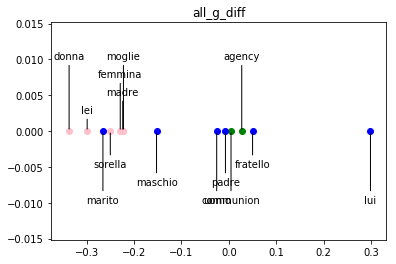

In [132]:
# all words plot g_diff
fig, ax = plt.subplots()
ax.scatter([mean_agency_g_diff, mean_communion_g_diff], [0, 0], color='green')
plot_gender_pairs(ax, g_diff, False)

ax.set_title('all_g_diff')

plt.annotate('agency',
            xy=(mean_agency_g_diff, 0),
            xytext=(mean_agency_g_diff, 0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_g_diff, 0),
            xytext=(mean_communion_g_diff, -0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_all_g_diff')

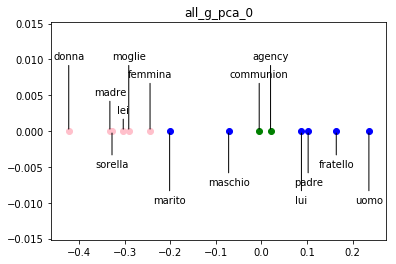

In [133]:
# all words plot g_pca_0
fig, ax = plt.subplots()
ax.scatter([mean_agency_g_pca_0, mean_communion_g_pca_0], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_0, False)

ax.set_title('all_g_pca_0')

plt.annotate('agency',
            xy=(mean_agency_g_pca_0, 0),
            xytext=(mean_agency_g_pca_0, 0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_g_pca_0, 0),
            xytext=(mean_communion_g_pca_0, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_all_g_pca_0')

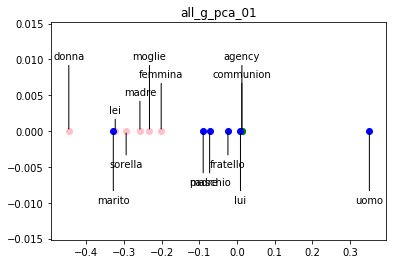

In [134]:
# all words plot g_pca_01
fig, ax = plt.subplots()
ax.scatter([mean_agency_g_pca_01, mean_communion_g_pca_01], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_01, False)

ax.set_title('all_g_pca_01')

plt.annotate('agency',
            xy=(mean_agency_g_pca_01, 0),
            xytext=(mean_agency_g_pca_01, 0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_g_pca_01, 0),
            xytext=(mean_communion_g_pca_01, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_all_g_pca_01')

/Users/davidebiasion/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/davidebiasion/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1785: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/Users/davidebiasion/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:853: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/Users/davidebiasion/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:714: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(textobj.convert_xunits(textobj._x))


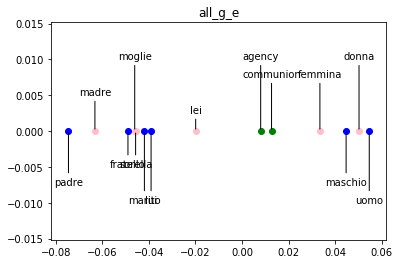

In [135]:
# all words plot g_e
fig, ax = plt.subplots()
ax.scatter([mean_agency_g_e, mean_communion_g_e], [0, 0], color='green')
plot_gender_pairs(ax, g_e, True)

ax.set_title('all_g_e')

plt.annotate('agency',
            xy=(mean_agency_g_e, 0),
            xytext=(mean_agency_g_e, 0.01), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_g_e, 0),
            xytext=(mean_communion_g_e, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_all_g_e')

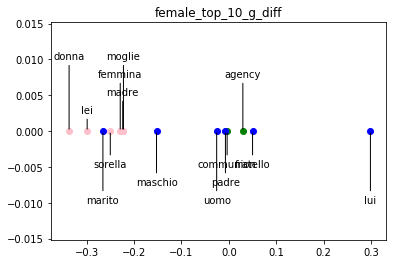

In [136]:
# female top 10 plot g_diff
fig, ax = plt.subplots()
ax.scatter([mean_agency_f_g_diff, mean_communion_f_g_diff], [0, 0], color='green')
plot_gender_pairs(ax, g_diff, False)

ax.set_title('female_top_10_g_diff')

plt.annotate('agency',
            xy=(mean_agency_f_g_diff, 0),
            xytext=(mean_agency_f_g_diff, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_f_g_diff, 0),
            xytext=(mean_communion_f_g_diff, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_f_g_diff')

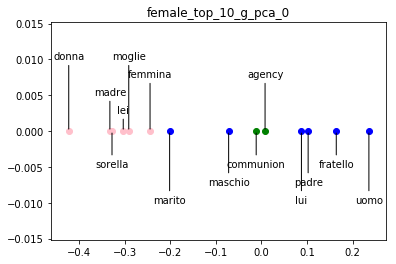

In [137]:
# female top 10 plot g_pca_0
fig, ax = plt.subplots()
ax.scatter([mean_agency_f_g_pca_0, mean_communion_f_g_pca_0], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_0, False)

ax.set_title('female_top_10_g_pca_0')

plt.annotate('agency',
            xy=(mean_agency_f_g_pca_0, 0),
            xytext=(mean_agency_f_g_pca_0, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_f_g_pca_0, 0),
            xytext=(mean_communion_f_g_pca_0, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_f_g_pca_0')

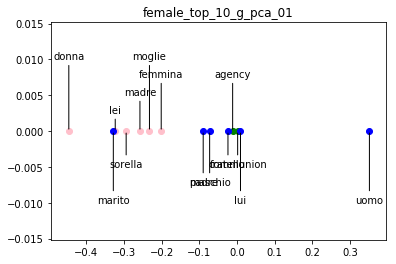

In [138]:
# female top 10 plot g_pca_01
fig, ax = plt.subplots()
ax.scatter([mean_agency_f_g_pca_01, mean_communion_f_g_pca_01], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_01, False)

ax.set_title('female_top_10_g_pca_01')

plt.annotate('agency',
            xy=(mean_agency_f_g_pca_01, 0),
            xytext=(mean_agency_f_g_pca_01, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_f_g_pca_01, 0),
            xytext=(mean_communion_f_g_pca_01, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_f_g_pca_01')

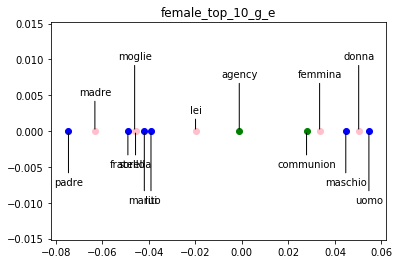

In [139]:
# female top 10 plot g_e
fig, ax = plt.subplots()
ax.scatter([mean_agency_f_g_e, mean_communion_f_g_e], [0, 0], color='green')
plot_gender_pairs(ax, g_e, True)

ax.set_title('female_top_10_g_e')

plt.annotate('agency',
            xy=(mean_agency_f_g_e, 0),
            xytext=(mean_agency_f_g_e, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_f_g_e, 0),
            xytext=(mean_communion_f_g_e, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_f_g_e')

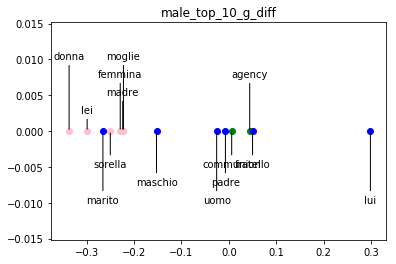

In [140]:
# male top 10 plot g_diff
fig, ax = plt.subplots()
ax.scatter([mean_agency_m_g_diff, mean_communion_m_g_diff], [0, 0], color='green')
plot_gender_pairs(ax, g_diff, False)

ax.set_title('male_top_10_g_diff')

plt.annotate('agency',
            xy=(mean_agency_m_g_diff, 0),
            xytext=(mean_agency_m_g_diff, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_m_g_diff, 0),
            xytext=(mean_communion_m_g_diff, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_m_g_diff')

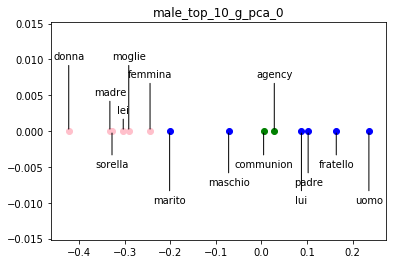

In [141]:
# male top 10 plot g_pca_0
fig, ax = plt.subplots()
ax.scatter([mean_agency_m_g_pca_0, mean_communion_m_g_pca_0], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_0, False)

ax.set_title('male_top_10_g_pca_0')

plt.annotate('agency',
            xy=(mean_agency_m_g_pca_0, 0),
            xytext=(mean_agency_m_g_pca_0, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_m_g_pca_0, 0),
            xytext=(mean_communion_m_g_pca_0, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_m_g_pca_0')

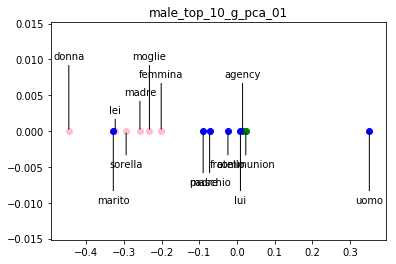

In [142]:
# male top 10 plot g_pca_01
fig, ax = plt.subplots()
ax.scatter([mean_agency_m_g_pca_01, mean_communion_m_g_pca_01], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_01, False)

ax.set_title('male_top_10_g_pca_01')

plt.annotate('agency',
            xy=(mean_agency_m_g_pca_01, 0),
            xytext=(mean_agency_m_g_pca_01, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_m_g_pca_01, 0),
            xytext=(mean_communion_m_g_pca_01, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_m_g_pca_01')

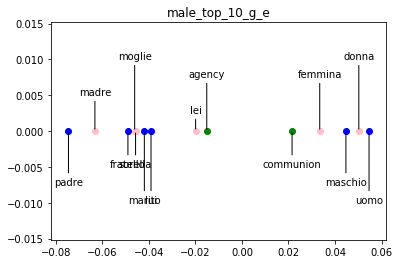

In [143]:
# male top 10 plot g_e
fig, ax = plt.subplots()
ax.scatter([mean_agency_m_g_e, mean_communion_m_g_e], [0, 0], color='green')
plot_gender_pairs(ax, g_e, True)

ax.set_title('male_top_10_g_e')

plt.annotate('agency',
            xy=(mean_agency_m_g_e, 0),
            xytext=(mean_agency_m_g_e, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_m_g_e, 0),
            xytext=(mean_communion_m_g_e, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_m_g_e')

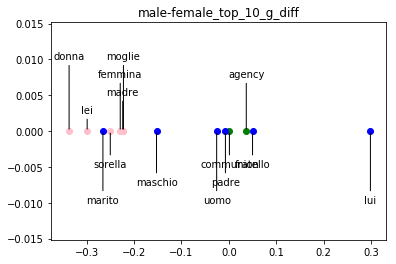

In [144]:
# male-female top 10 plot g_diff
fig, ax = plt.subplots()
ax.scatter([mean_agency_mf_g_diff, mean_communion_mf_g_diff], [0, 0], color='green')
plot_gender_pairs(ax, g_diff, False)

ax.set_title('male-female_top_10_g_diff')

plt.annotate('agency',
            xy=(mean_agency_mf_g_diff, 0),
            xytext=(mean_agency_mf_g_diff, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_mf_g_diff, 0),
            xytext=(mean_communion_mf_g_diff, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_mf_g_diff')

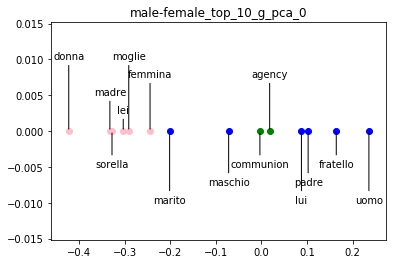

In [145]:
# male-female top 10 plot g_pca_0
fig, ax = plt.subplots()
ax.scatter([mean_agency_mf_g_pca_0, mean_communion_mf_g_pca_0], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_0, False)

ax.set_title('male-female_top_10_g_pca_0')

plt.annotate('agency',
            xy=(mean_agency_mf_g_pca_0, 0),
            xytext=(mean_agency_mf_g_pca_0, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_mf_g_pca_0, 0),
            xytext=(mean_communion_mf_g_pca_0, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_mf_g_pca_0')

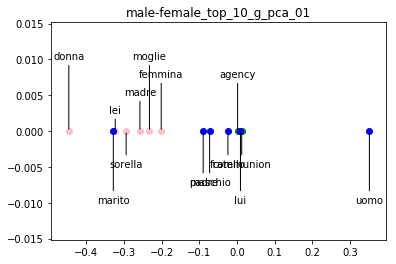

In [146]:
# male-female top 10 plot g_pca_01
fig, ax = plt.subplots()
ax.scatter([mean_agency_mf_g_pca_01, mean_communion_mf_g_pca_01], [0, 0], color='green')
plot_gender_pairs(ax, g_pca_01, False)

ax.set_title('male-female_top_10_g_pca_01')

plt.annotate('agency',
            xy=(mean_agency_mf_g_pca_01, 0),
            xytext=(mean_agency_mf_g_pca_01, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_mf_g_pca_01, 0),
            xytext=(mean_communion_mf_g_pca_01, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_mf_g_pca_01')

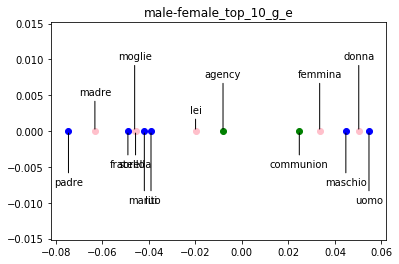

In [147]:
# male-female top 10 plot g_e
fig, ax = plt.subplots()
ax.scatter([mean_agency_mf_g_e, mean_communion_mf_g_e], [0, 0], color='green')
plot_gender_pairs(ax, g_e, True)

ax.set_title('male-female_top_10_g_e')

plt.annotate('agency',
            xy=(mean_agency_mf_g_e, 0),
            xytext=(mean_agency_mf_g_e, 0.0075), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))
plt.annotate('communion',
            xy=(mean_communion_mf_g_e, 0),
            xytext=(mean_communion_mf_g_e, -0.005), 
            horizontalalignment='center',
            arrowprops=dict(arrowstyle='-'))

plt.show()
#fig.savefig('plot/ft_deb_mf_g_e')

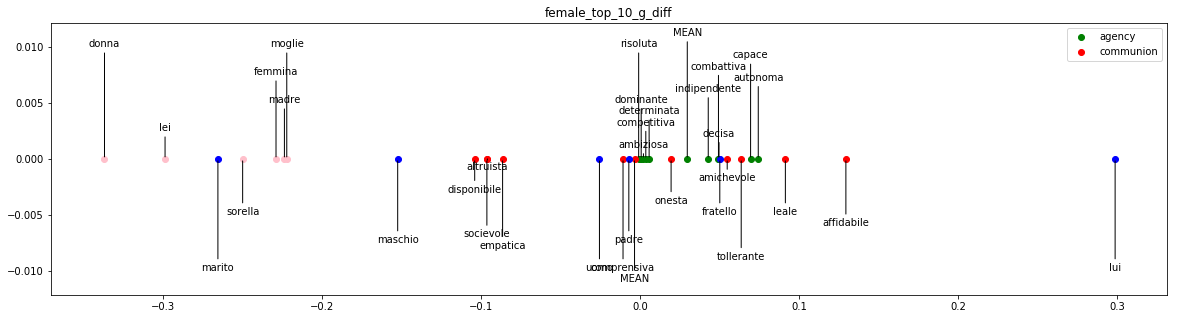

In [148]:
# female top 10 detailed plot g_diff
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_f_col1], np.zeros(len(agency_f_col1)), color='green', label='agency')
ax.scatter([communion_f_col1], np.zeros(len(communion_f_col1)), color='red', label='communion')
plot_gender_pairs(ax, g_diff, False)
ax.set_title('female_top_10_g_diff')
ax.legend(facecolor='white')

for i in range(len(agency_f_col0)):
    plt.annotate(agency_f_col0[i],
                xy=(agency_f_col1[i], 0),
                xytext=(agency_f_col1[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_f_col0[i],
                xy=(communion_f_col1[i], 0),
                xytext=(communion_f_col1[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_f_g_diff')

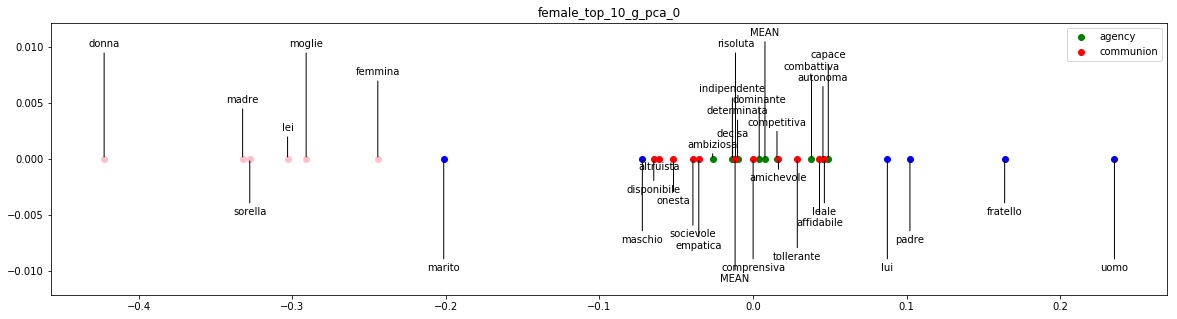

In [149]:
# female top 10 detailed plot g_pca_0
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_f_col2], np.zeros(len(agency_f_col2)), color='green', label='agency')
ax.scatter([communion_f_col2], np.zeros(len(communion_f_col2)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_0, False)
ax.set_title('female_top_10_g_pca_0')
ax.legend(facecolor='white')

for i in range(len(agency_f_col0)):
    plt.annotate(agency_f_col0[i],
                xy=(agency_f_col2[i], 0),
                xytext=(agency_f_col2[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_f_col0[i],
                xy=(communion_f_col2[i], 0),
                xytext=(communion_f_col2[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_f_g_pca_0')

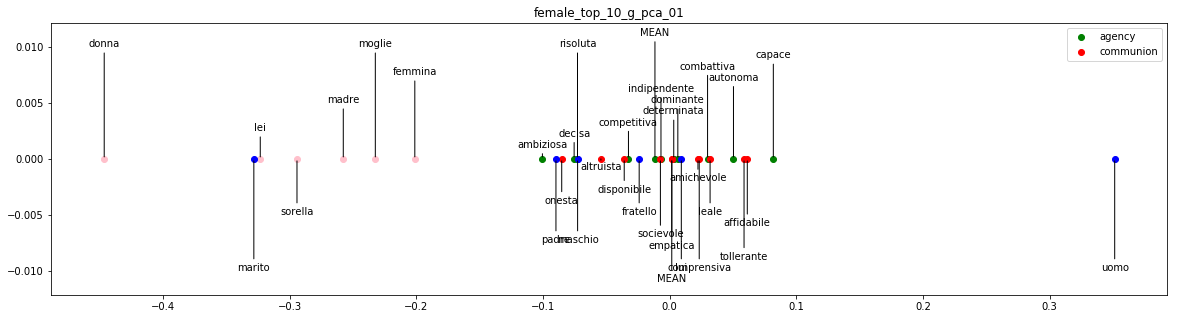

In [150]:
# female top 10 detailed plot g_pca_01
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_f_col3], np.zeros(len(agency_f_col3)), color='green', label='agency')
ax.scatter([communion_f_col3], np.zeros(len(communion_f_col3)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_01, False)
ax.set_title('female_top_10_g_pca_01')
ax.legend(facecolor='white')

for i in range(len(agency_f_col0)):
    plt.annotate(agency_f_col0[i],
                xy=(agency_f_col3[i], 0),
                xytext=(agency_f_col3[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_f_col0[i],
                xy=(communion_f_col3[i], 0),
                xytext=(communion_f_col3[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_f_g_pca_01')

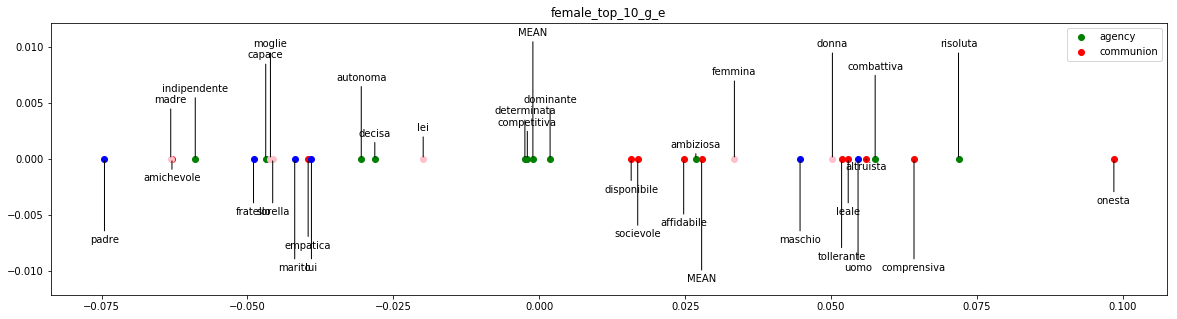

In [151]:
# female top 10 detailed plot g_e
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_f_col4], np.zeros(len(agency_f_col4)), color='green', label='agency')
ax.scatter([communion_f_col4], np.zeros(len(communion_f_col4)), color='red', label='communion')
plot_gender_pairs(ax, g_e, False)
ax.set_title('female_top_10_g_e')
ax.legend(facecolor='white')

for i in range(len(agency_f_col0)):
    plt.annotate(agency_f_col0[i],
                xy=(agency_f_col4[i], 0),
                xytext=(agency_f_col4[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_f_col0[i],
                xy=(communion_f_col4[i], 0),
                xytext=(communion_f_col4[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_f_g_e')

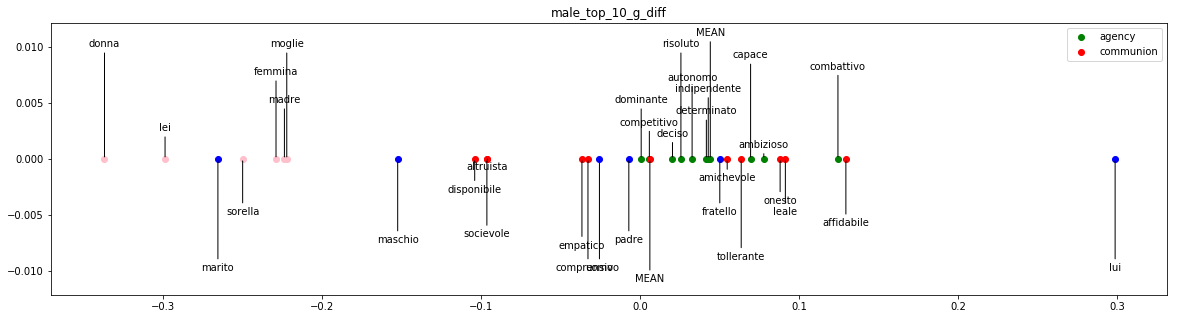

In [152]:
# male top 10 detailed plot g_diff
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_m_col1], np.zeros(len(agency_m_col1)), color='green', label='agency')
ax.scatter([communion_m_col1], np.zeros(len(communion_m_col1)), color='red', label='communion')
plot_gender_pairs(ax, g_diff, False)
ax.set_title('male_top_10_g_diff')
ax.legend(facecolor='white')

for i in range(len(agency_m_col0)):
    plt.annotate(agency_m_col0[i],
                xy=(agency_m_col1[i], 0),
                xytext=(agency_m_col1[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_m_col0[i],
                xy=(communion_m_col1[i], 0),
                xytext=(communion_m_col1[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_m_g_diff')

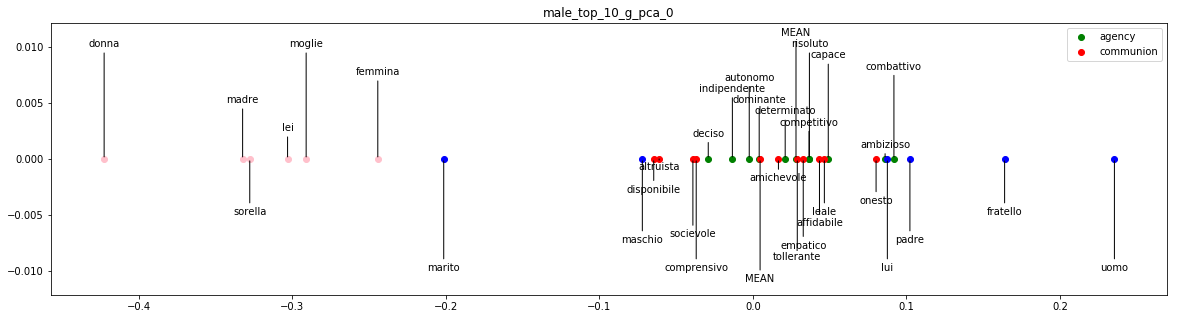

In [153]:
# male top 10 detailed plot g_pca_0
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_m_col2], np.zeros(len(agency_m_col2)), color='green', label='agency')
ax.scatter([communion_m_col2], np.zeros(len(communion_m_col2)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_0, False)
ax.set_title('male_top_10_g_pca_0')
ax.legend(facecolor='white')

for i in range(len(agency_m_col0)):
    plt.annotate(agency_m_col0[i],
                xy=(agency_m_col2[i], 0),
                xytext=(agency_m_col2[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_m_col0[i],
                xy=(communion_m_col2[i], 0),
                xytext=(communion_m_col2[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_m_g_pca_0')

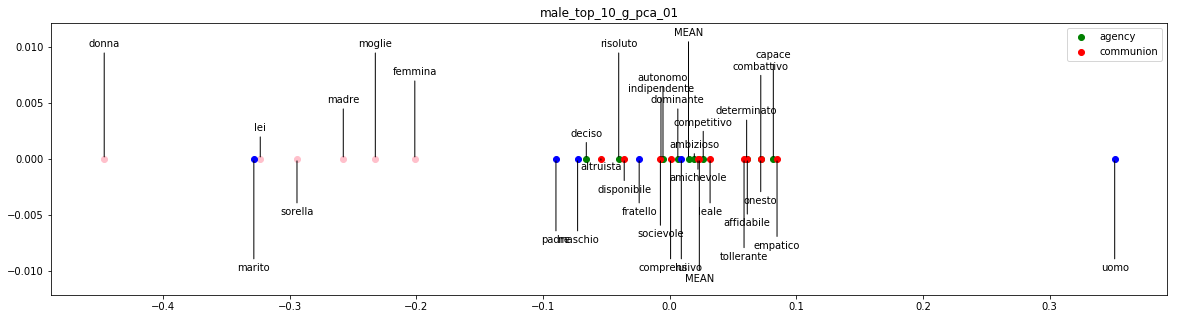

In [154]:
# male top 10 detailed plot g_pca_01
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_m_col3], np.zeros(len(agency_m_col3)), color='green', label='agency')
ax.scatter([communion_m_col3], np.zeros(len(communion_m_col3)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_01, False)
ax.set_title('male_top_10_g_pca_01')
ax.legend(facecolor='white')

for i in range(len(agency_m_col0)):
    plt.annotate(agency_m_col0[i],
                xy=(agency_m_col3[i], 0),
                xytext=(agency_m_col3[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_m_col0[i],
                xy=(communion_m_col3[i], 0),
                xytext=(communion_m_col3[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_m_g_pca_01')

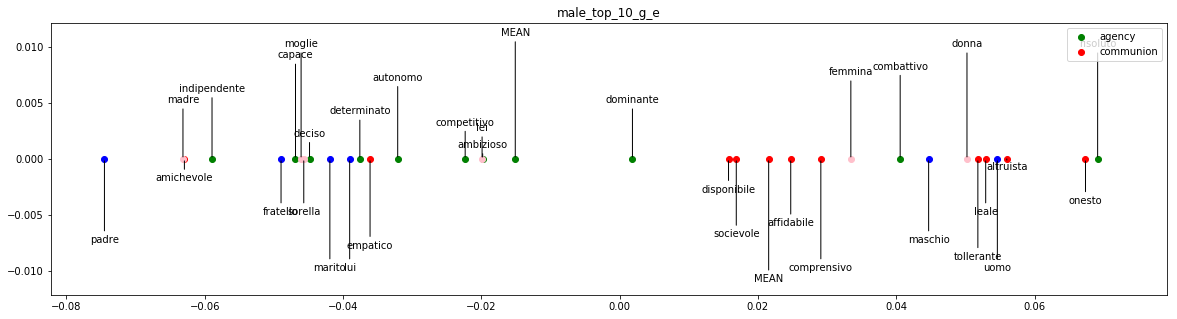

In [155]:
# male top 10 detailed plot g_e
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_m_col4], np.zeros(len(agency_m_col4)), color='green', label='agency')
ax.scatter([communion_m_col4], np.zeros(len(communion_m_col4)), color='red', label='communion')
plot_gender_pairs(ax, g_e, False)
ax.set_title('male_top_10_g_e')
ax.legend(facecolor='white')

for i in range(len(agency_m_col0)):
    plt.annotate(agency_m_col0[i],
                xy=(agency_m_col4[i], 0),
                xytext=(agency_m_col4[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_m_col0[i],
                xy=(communion_m_col4[i], 0),
                xytext=(communion_m_col4[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_m_g_e')

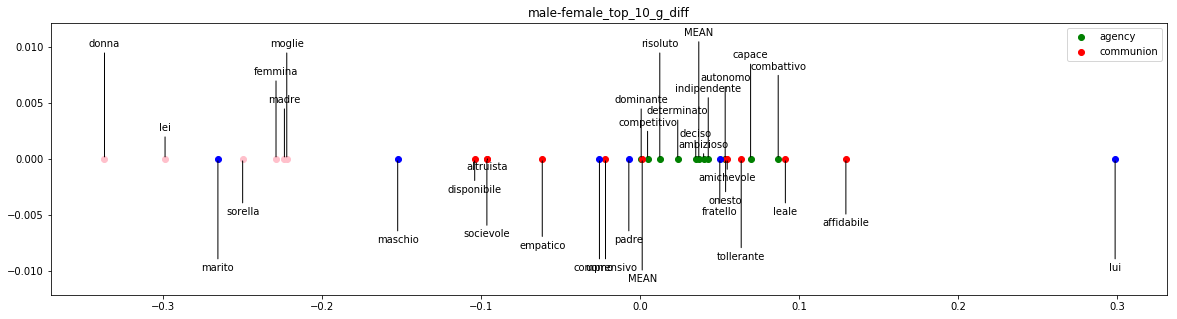

In [156]:
# male-female top 10 detailed plot g_diff
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_mf_col1], np.zeros(len(agency_mf_col1)), color='green', label='agency')
ax.scatter([communion_mf_col1], np.zeros(len(communion_mf_col1)), color='red', label='communion')
plot_gender_pairs(ax, g_diff, False)
ax.set_title('male-female_top_10_g_diff')
ax.legend(facecolor='white')

for i in range(len(agency_mf_col0)):
    plt.annotate(agency_mf_col0[i],
                xy=(agency_mf_col1[i], 0),
                xytext=(agency_mf_col1[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_mf_col0[i],
                xy=(communion_mf_col1[i], 0),
                xytext=(communion_mf_col1[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_mf_g_diff')

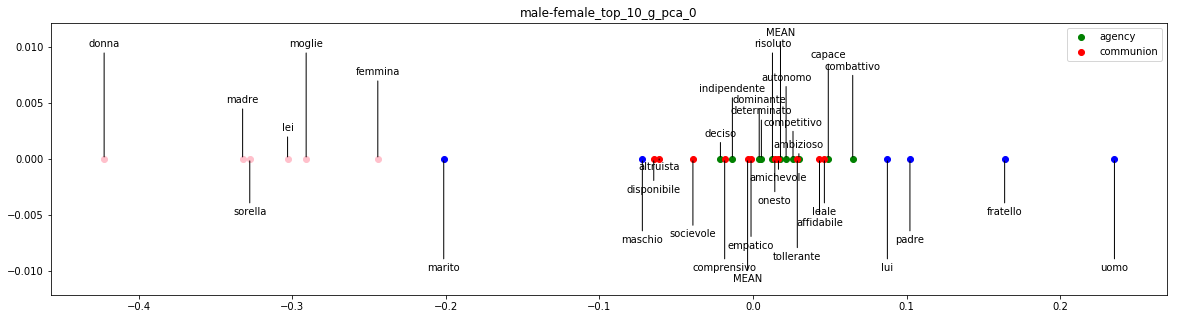

In [157]:
# male-female top 10 detailed plot g_pca_0
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_mf_col2], np.zeros(len(agency_mf_col2)), color='green', label='agency')
ax.scatter([communion_mf_col2], np.zeros(len(communion_mf_col2)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_0, False)
ax.set_title('male-female_top_10_g_pca_0')
ax.legend(facecolor='white')

for i in range(len(agency_mf_col0)):
    plt.annotate(agency_mf_col0[i],
                xy=(agency_mf_col2[i], 0),
                xytext=(agency_mf_col2[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_mf_col0[i],
                xy=(communion_mf_col2[i], 0),
                xytext=(communion_mf_col2[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_mf_g_pca_0')

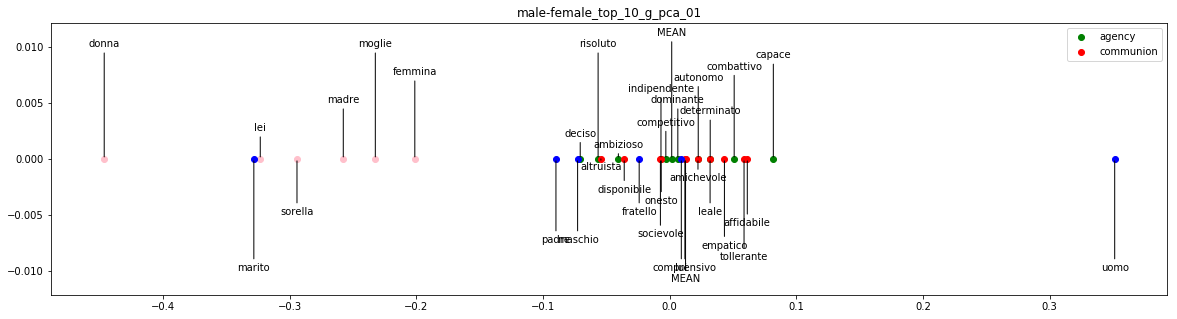

In [158]:
# male-female top 10 detailed plot g_pca_01
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_mf_col3], np.zeros(len(agency_mf_col3)), color='green', label='agency')
ax.scatter([communion_mf_col3], np.zeros(len(communion_mf_col3)), color='red', label='communion')
plot_gender_pairs(ax, g_pca_01, False)
ax.set_title('male-female_top_10_g_pca_01')
ax.legend(facecolor='white')

for i in range(len(agency_mf_col0)):
    plt.annotate(agency_mf_col0[i],
                xy=(agency_mf_col3[i], 0),
                xytext=(agency_mf_col3[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_mf_col0[i],
                xy=(communion_mf_col3[i], 0),
                xytext=(communion_mf_col3[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_mf_g_pca_01')

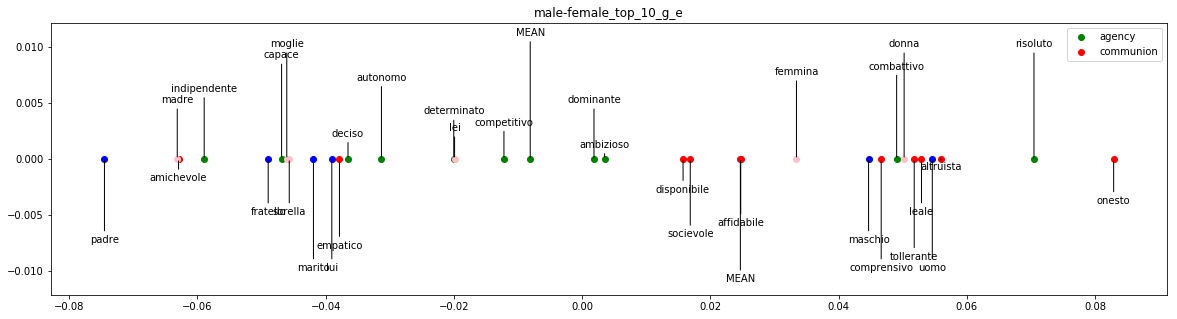

In [159]:
# male-female top 10 detailed plot g_e
fig = plt.figure(figsize=(20,5))    
ax = fig.add_subplot(111)
ax.scatter([agency_mf_col4], np.zeros(len(agency_mf_col4)), color='green', label='agency')
ax.scatter([communion_mf_col4], np.zeros(len(communion_mf_col4)), color='red', label='communion')
plot_gender_pairs(ax, g_e, False)
ax.set_title('male-female_top_10_g_e')
ax.legend(facecolor='white')

for i in range(len(agency_mf_col0)):
    plt.annotate(agency_mf_col0[i],
                xy=(agency_mf_col4[i], 0),
                xytext=(agency_mf_col4[i], 0.001+i*0.001), 
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))

    plt.annotate(communion_mf_col0[i],
                xy=(communion_mf_col4[i], 0),
                xytext=(communion_mf_col4[i], -0.001-i*0.001),
                horizontalalignment='center',
                arrowprops=dict(arrowstyle='-'))


plt.show()
#fig.savefig('plot/detailed/ft_deb_mf_g_e')